In [1]:
import pandas as pd
import os
import matplotlib as plt

In [3]:
years = [19, 20, 21, 22, 23, 24]
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
lines_data = {}
routes_data = {}
trips_data = {}
calendar_data = {}
stop_times_data = {}

for year in years:
    for season in seasons:
        file_path = f'/Users/lto/Desktop/MBTA_data/csv/{year}{season}_csv/lines.csv'
        lines_data[f'lines_{year}{season}'] = pd.read_csv(file_path, delimiter=',')
        lines_data[f'lines_{year}{season}'] = lines_data[f'lines_{year}{season}'].drop(columns=['line_desc', 'line_url', 'line_short_name'], errors='ignore')
        globals()[f'lines_{year}{season}'] = lines_data[f'lines_{year}{season}']

for year in years:
    for season in seasons:
        file_path = f'/Users/lto/Desktop/MBTA_data/csv/{year}{season}_csv/routes.csv'
        routes_data[f'routes_{year}{season}'] = pd.read_csv(file_path, delimiter=',')
        globals()[f'routes_{year}{season}'] = routes_data[f'routes_{year}{season}']
        
        file_path = f'/Users/lto/Desktop/MBTA_data/csv/{year}{season}_csv/trips.csv'
        trips_data[f'trips_{year}{season}'] = pd.read_csv(file_path, delimiter=',')
        globals()[f'trips_{year}{season}'] = trips_data[f'trips_{year}{season}']
        
        file_path = f'/Users/lto/Desktop/MBTA_data/csv/{year}{season}_csv/calendar.csv'
        calendar_data[f'calendar_{year}{season}'] = pd.read_csv(file_path, delimiter=',')
        globals()[f'calendar_{year}{season}'] = calendar_data[f'calendar_{year}{season}']
        
        file_path = f'/Users/lto/Desktop/MBTA_data/csv/{year}{season}_csv/stop_times.csv'
        stop_times_data[f'stop_times_{year}{season}'] = pd.read_csv(file_path, delimiter=',')
        globals()[f'stop_times_{year}{season}'] = stop_times_data[f'stop_times_{year}{season}']
        

/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/770020020.py:31: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  stop_times_data[f'stop_times_{year}{season}'] = pd.read_csv(file_path, delimiter=',')
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/770020020.py:31: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  stop_times_data[f'stop_times_{year}{season}'] = pd.read_csv(file_path, delimiter=',')
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/770020020.py:23: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  trips_data[f'trips_{year}{season}'] = pd.read_csv(file_path, delimiter=',')
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/770020020.py:31: DtypeWarning: Columns (0,3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  stop_tim

Focus on commuter rail (route_id that starts with 'CR-')

In [4]:
cr_line = {}
filtered_list = []

for year in years:
    for season in seasons:
        current_trips = trips_data[f'trips_{year}{season}']
        
        cr_trips = current_trips[current_trips['route_id'].str.startswith('CR-')]
        trips_data[f'trips_{year}{season}'] = cr_trips
        globals()[f'trips_{year}{season}'] = cr_trips  

trips_24Fall.head()


route_id                       service_id                  trip_id  \
63361  CR-Fairmount  SPRING2024-SOUTHSAT-Saturday-31  ForestHills-693844-1927   
63362  CR-Fairmount  SPRING2024-SOUTHSAT-Saturday-31  ForestHills-693856-1963   
63363  CR-Fairmount  SPRING2024-SOUTHSAT-Saturday-31  ForestHills-693859-1957   
63364  CR-Fairmount  SPRING2024-SOUTHSAT-Saturday-31  ForestHills-693860-1949   
63365  CR-Fairmount  SPRING2024-SOUTHSAT-Saturday-31  ForestHills-693863-1917   

      trip_headsign trip_short_name  direction_id block_id shape_id  \
63361     Readville            1927             0   BLY-01  9870002   
63362     Readville            1963             0   BLY-01  9870002   
63363     Readville            1957             0   BLY-01  9870002   
63364     Readville            1949             0   BLY-01  9870002   
63365     Readville            1917             0   BLY-01  9870002   

       wheelchair_accessible  trip_route_type         route_pattern_id  \
63361                      1              NaN  CR-Fairmount-195ea3c8-0   
63362                      1              NaN  CR-Fairmount-195ea3c8-0   
63363                      1              NaN  CR-Fairmount-195ea3c8-0   
63364                      1              NaN  CR-Fairmount-195ea3c8-0   
63365                      1              NaN  CR-Fairmount-195ea3c8-0   

       bikes_allowed  
63361              1  
63362              1  
63363              1  
63364              1  
63365              1

Define time of day

In [5]:
def time_of_day(time_str):
    hour = int(time_str.split(':')[0]) 
    
    if 3 <= hour < 6:
        return 'Sunrise'
    elif 6 <= hour < 7:
        return 'Early AM'
    elif 7 <= hour < 9:
        return 'AM Peak'
    elif 9 <= hour < 13.5:
        return 'Midday Base'
    elif 13.5 <= hour < 16:
        return 'Midday School'
    elif 16 <= hour < 18.5:
        return 'PM Peak'
    elif 18.5 <= hour < 22:
        return 'Evening'
    elif 22 <= hour < 24:
        return 'Late Evening'
    else:
        return 'Night'

In [6]:
for year in years:
    for season in seasons:
        stop_times = stop_times_data.get(f'stop_times_{year}{season}')
        if stop_times is not None:
            stop_times['time_period'] = stop_times['arrival_time'].apply(time_of_day)
            trips = trips_data.get(f'trips_{year}{season}')
            if trips is not None:
                merged_data1 = stop_times.merge(trips[['trip_id', 'route_id', 'block_id']], on='trip_id')


In [7]:
def fix_arrival_time(time_str):
    try:
        hours, minutes, seconds = map(int, time_str.split(":"))
        if hours >= 24:
            hours -= 24
            return f"{hours:02}:{minutes:02}:{seconds:02}"
        return time_str
    except ValueError:
        return None

for season in seasons:
    stop_times = stop_times_data.get(f'stop_times_24{season}')
    if stop_times is not None:
        stop_times['arrival_time'] = stop_times['arrival_time'].apply(fix_arrival_time)
  


In [8]:

merged_data1.to_csv('/Users/lto/Desktop/merged_data1.csv', index=False)

In [9]:
trip_counts1 = pd.DataFrame()
years = [19, 20, 21, 22, 23, 24]
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
for year in years:
    for season in seasons:
        # get stop times for current season
        stop_times = stop_times_data.get(f'stop_times_{year}{season}')
        if stop_times is not None:
            # add time period for stop times
            stop_times['time_period'] = stop_times['arrival_time'].apply(time_of_day)
            
            # get trips for current season
            trips = trips_data.get(f'trips_{year}{season}')
            if trips is not None:
         
                merged_data = stop_times.merge(trips[['trip_id', 'route_id', 'block_id']], on='trip_id')
                
                grouped = merged_data.groupby(['time_period', 'route_id']).size().reset_index(name='Trip Count')
                
                grouped['Year'] = year
                grouped['Season'] = season
                
                trip_counts1 = pd.concat([trip_counts1, grouped], ignore_index=True)

In [10]:
trip_counts1.head()

time_period      route_id  Trip Count  Year  Season
0     AM Peak  CR-Fairmount         210    19  Spring
1     AM Peak  CR-Fitchburg         386    19  Spring
2     AM Peak   CR-Franklin         188    19  Spring
3     AM Peak  CR-Greenbush         132    19  Spring
4     AM Peak  CR-Haverhill         210    19  Spring

In [11]:
#save to csv
trip_counts1.to_csv('/Users/lto/Desktop/trip_counts1.csv', index=False)

Visualize the number of train by time of day

Focus on Only Weekdays

In [12]:
def get_weekday_services(years, seasons, calendar_data):
    weekday_services = set()
    for year in years:
        for season in seasons:
            calendar_key = f'calendar_{year}{season}'
      
            if calendar_data is not None and calendar_key in calendar_data:
                calendar_df = calendar_data[calendar_key]
                weekdays = calendar_df[(calendar_df['monday'] == 1) |
                                       (calendar_df['tuesday'] == 1) |
                                       (calendar_df['wednesday'] == 1) |
                                       (calendar_df['thursday'] == 1) |
                                       (calendar_df['saturday'] == 1) |
                                       (calendar_df['sunday'] == 1) |
                                       (calendar_df['friday'] == 1)]
                weekday_services.update(weekdays['service_id'].unique())
            else:
                print(f'No calendar data for {year}{season} or calendar_data is None')
    return weekday_services

def filter_weekday_trips(years, seasons, stop_times_data, trips_data, weekday_services):
    trip_counts = pd.DataFrame()
    for year in years:
        for season in seasons:
            stop_times_key = f'stop_times_{year}{season}'
            trips_key = f'trips_{year}{season}'
            if stop_times_key in stop_times_data and trips_key in trips_data:
                stop_times = stop_times_data[stop_times_key]
                trips = trips_data[trips_key]

                stop_times['time_period'] = stop_times['arrival_time'].apply(time_of_day)
                merged_data = stop_times.merge(trips[['trip_id', 'route_id', 'block_id', 'service_id']], on='trip_id')
                
                # keep only weekday
                merged_data = merged_data[merged_data['service_id'].isin(weekday_services)]

                # count number of trips 
                grouped = merged_data.groupby(['time_period', 'route_id']).size().reset_index(name='Trip Count')

                # add year and season
                grouped['Year'] = year
                grouped['Season'] = season
                
                trip_counts = pd.concat([trip_counts, grouped], ignore_index=True)
            else:
                print(f'No data for {stop_times_key} or {trips_key}')

    return trip_counts

if calendar_data is not None:
    weekday_services = get_weekday_services(years, seasons, calendar_data)
    trip_counts = filter_weekday_trips(years, seasons, stop_times_data, trips_data, weekday_services)

   
    print(trip_counts)
else:
    print('calendar_data is None. Please check your data loading logic.')

     time_period          route_id  Trip Count  Year  Season
0        AM Peak      CR-Fairmount         152    19  Spring
1        AM Peak      CR-Fitchburg         125    19  Spring
2        AM Peak       CR-Franklin         160    19  Spring
3        AM Peak      CR-Greenbush         102    19  Spring
4        AM Peak      CR-Haverhill         172    19  Spring
...          ...               ...         ...   ...     ...
2515     Sunrise  CR-Middleborough          27    24  Winter
2516     Sunrise        CR-Needham          24    24  Winter
2517     Sunrise    CR-Newburyport          49    24  Winter
2518     Sunrise     CR-Providence          92    24  Winter
2519     Sunrise      CR-Worcester          94    24  Winter

[2520 rows x 5 columns]


In [13]:
trip_counts = trip_counts1

Number of trips for each CR line in each year

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_annual_trip_counts(route_id, trip_counts):
    # Filter data for the specified route
    route_data = trip_counts[trip_counts['route_id'] == route_id]

    # Define the ordered time periods for consistent plotting
    time_period_order = ['Sunrise', 'Early AM', 'AM Peak', 'Midday Base', 
                         'Midday School', 'PM Peak', 'Evening', 'Late Evening', 'Night']

    plt.figure(figsize=(10, 7))

    # Define a color map and line styles for the years
    colors = plt.cm.viridis([0.1, 0.3, 0.5, 0.7, 0.9, 1.0])  # Use a colormap for distinctive colors
    years = [19, 20, 21, 22, 23, 24]
    
    # Plot each year as a separate line
    for i, year in enumerate(years):
        # Extract data for the specific year
        year_data = route_data[route_data['Year'] == year]
        
        # Aggregate trip counts by time period, reindex, and fill missing values with zero
        year_counts = year_data.groupby('time_period')['Trip Count'].sum().reindex(time_period_order).fillna(0)

        # Plot the line for the current year
        plt.plot(time_period_order, year_counts.values, marker='o', color=colors[i], linewidth=2, label=f'20{year}')

    # Add titles, labels, and legend
    plt.title(f'Trip Counts by Time Period for Route {route_id} (2019-2024)', fontsize=16)
    plt.xlabel('Time Period')
    plt.ylabel('Trip Counts')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.legend(title="Year", loc="upper left")

    # Show the plot
    plt.tight_layout()
    plt.show()




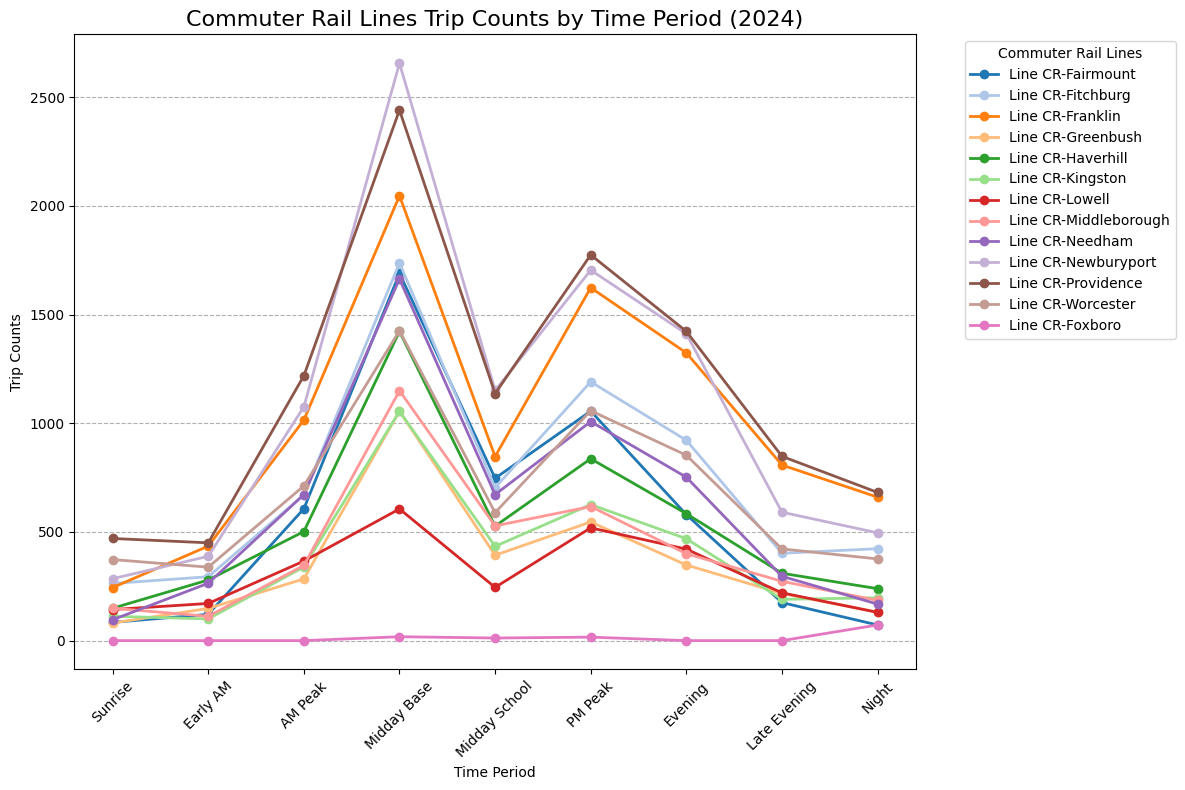

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_commuter_lines_2024(trip_counts):
    # Ensure the 'Year' column exists
    if 'Year' not in trip_counts.columns:
        trip_counts['Year'] = pd.to_datetime(trip_counts['start_date']).dt.year % 100

    # Filter data for the year 2024
    data_2024 = trip_counts[trip_counts['Year'] == 24]

    # Define the ordered time periods for consistent plotting
    time_period_order = ['Sunrise', 'Early AM', 'AM Peak', 'Midday Base', 
                         'Midday School', 'PM Peak', 'Evening', 'Late Evening', 'Night']

    plt.figure(figsize=(12, 8))

    # Get all unique commuter rail line IDs
    commuter_lines = data_2024['route_id'].unique()
    
    # Use a colormap with a large number of distinct colors
    colors = plt.cm.tab20(range(len(commuter_lines)))

    # Plot data for each commuter rail line
    for i, line in enumerate(commuter_lines):
        # Filter data for the current line
        line_data = data_2024[data_2024['route_id'] == line]

        # Aggregate trip counts by time period, reindex, and fill missing values with zero
        line_counts = line_data.groupby('time_period')['Trip Count'].sum().reindex(time_period_order).fillna(0)

        # Plot the line for the current commuter rail line
        plt.plot(time_period_order, line_counts.values, marker='o', color=colors[i], linewidth=2, label=f'Line {line}')

    # Add titles, labels, and legend
    plt.title('Commuter Rail Lines Trip Counts by Time Period (2024)', fontsize=16)
    plt.xlabel('Time Period')
    plt.ylabel('Trip Counts')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.legend(title="Commuter Rail Lines", loc="upper left", bbox_to_anchor=(1.05, 1))

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
plot_commuter_lines_2024(trip_counts1)

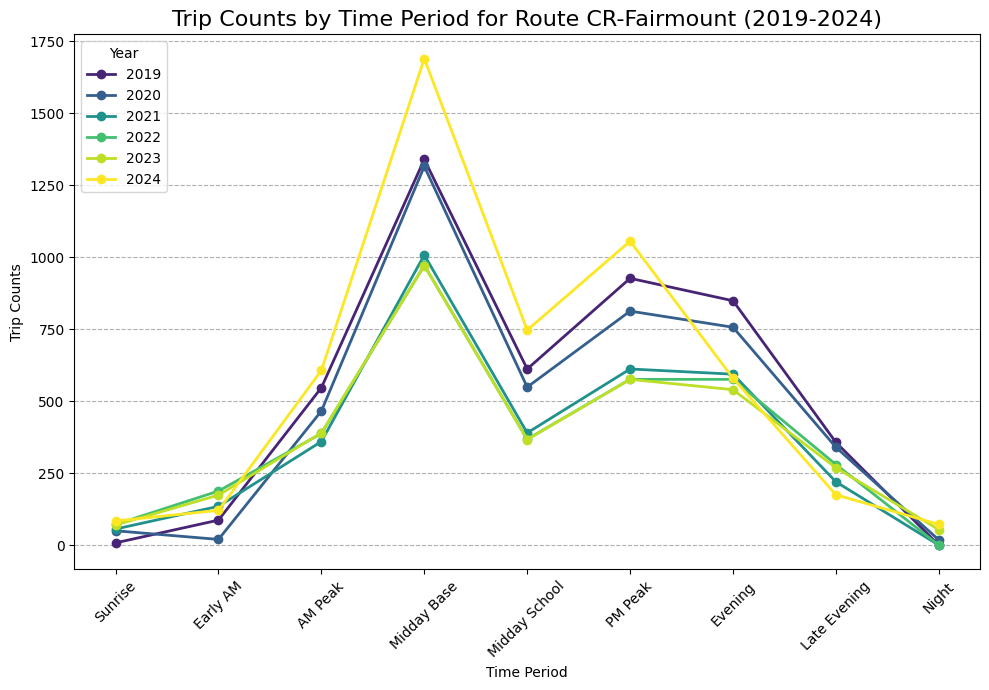

In [15]:
# Example call to the function
plot_annual_trip_counts("CR-Fairmount", trip_counts1)

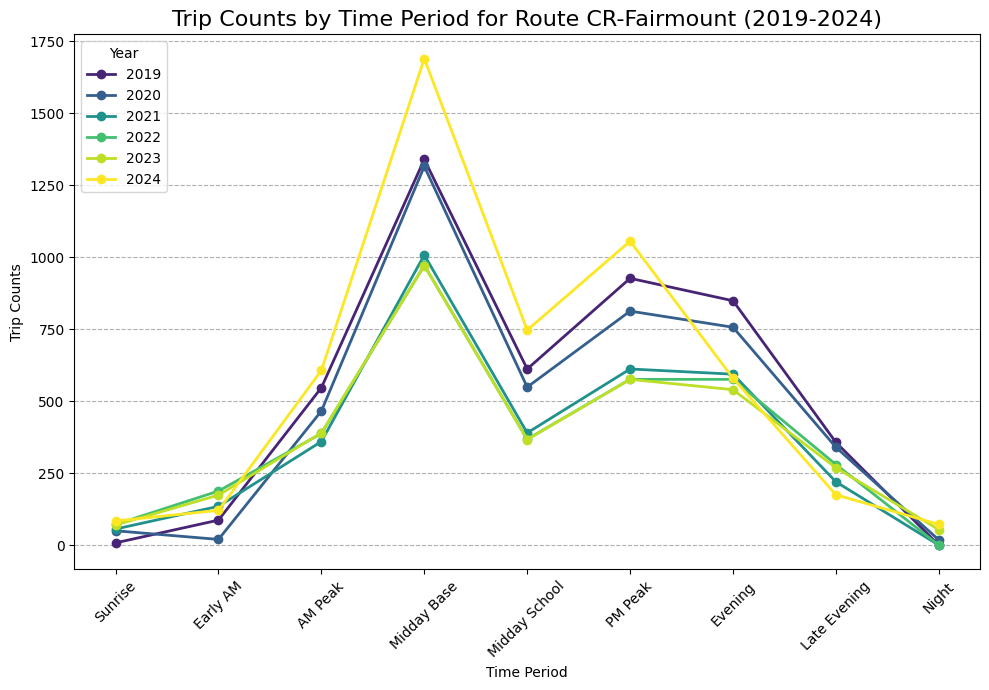

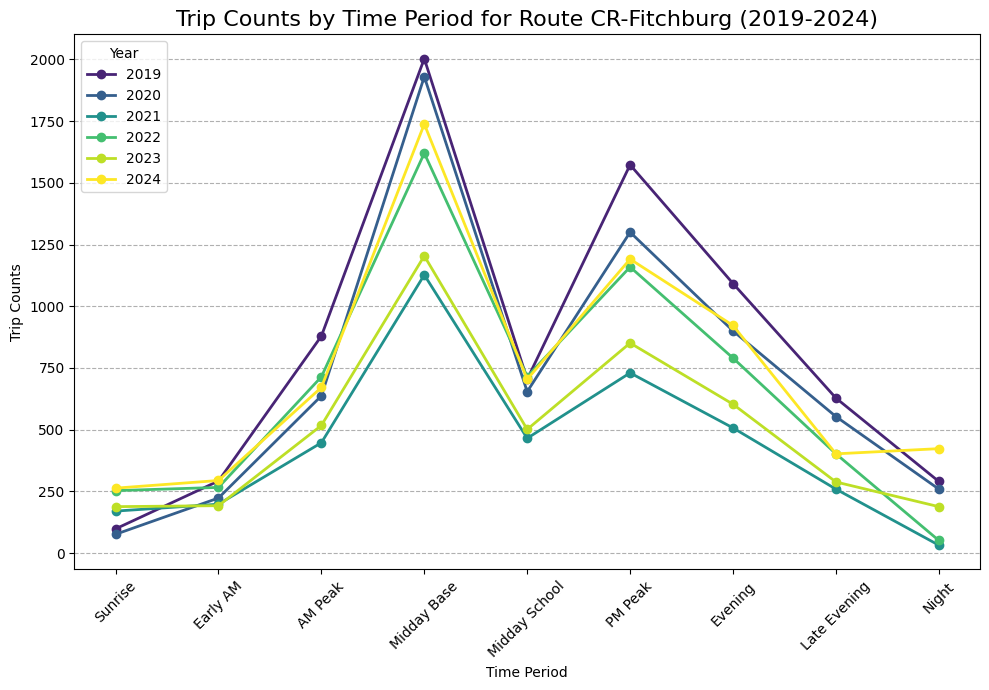

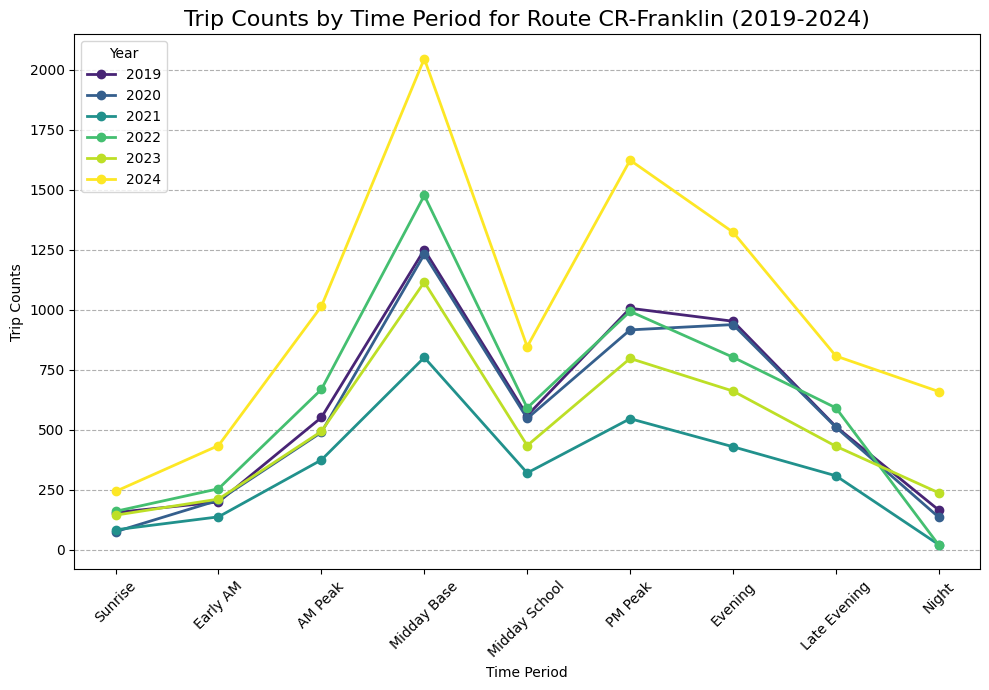

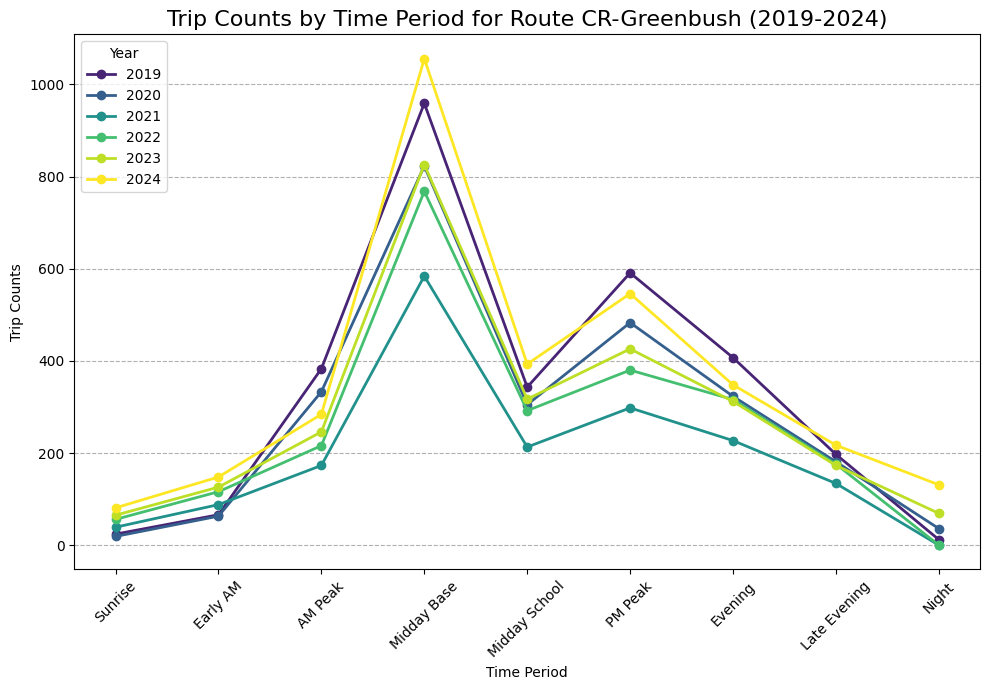

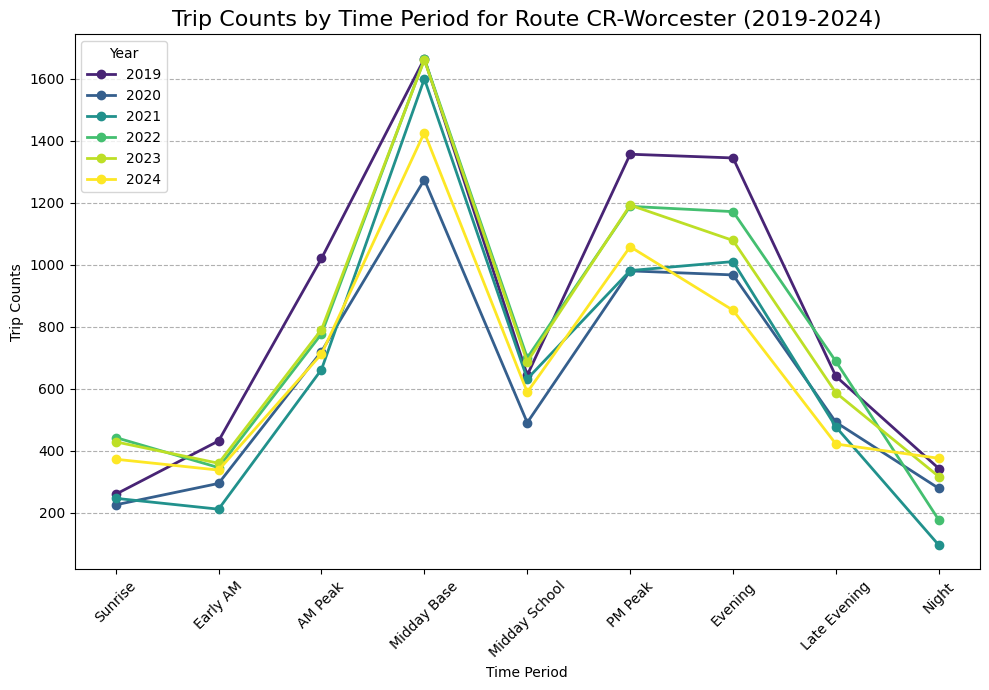

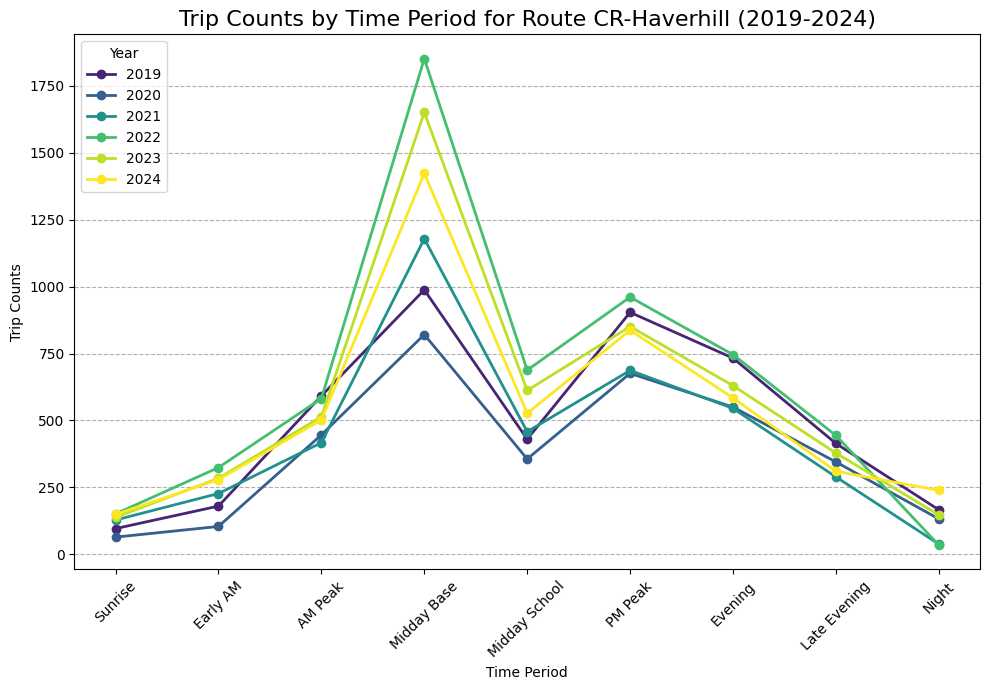

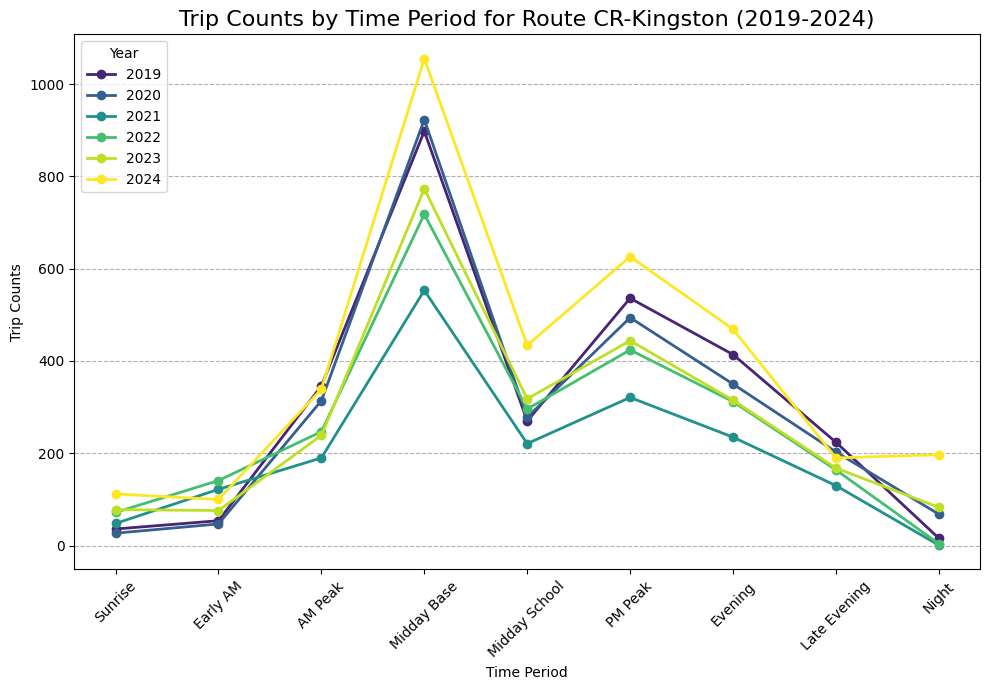

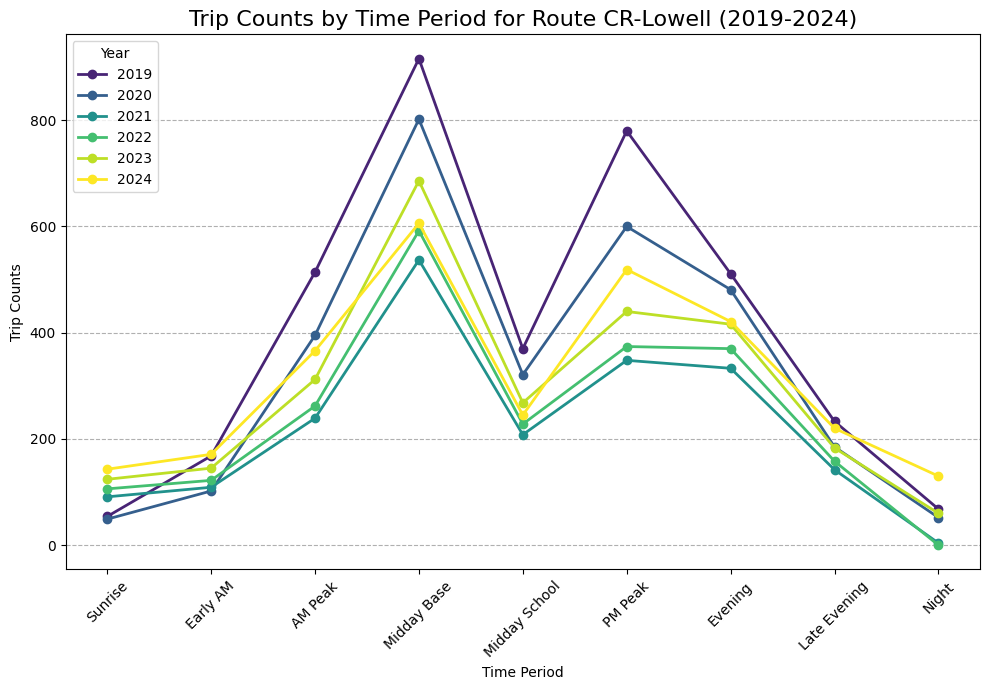

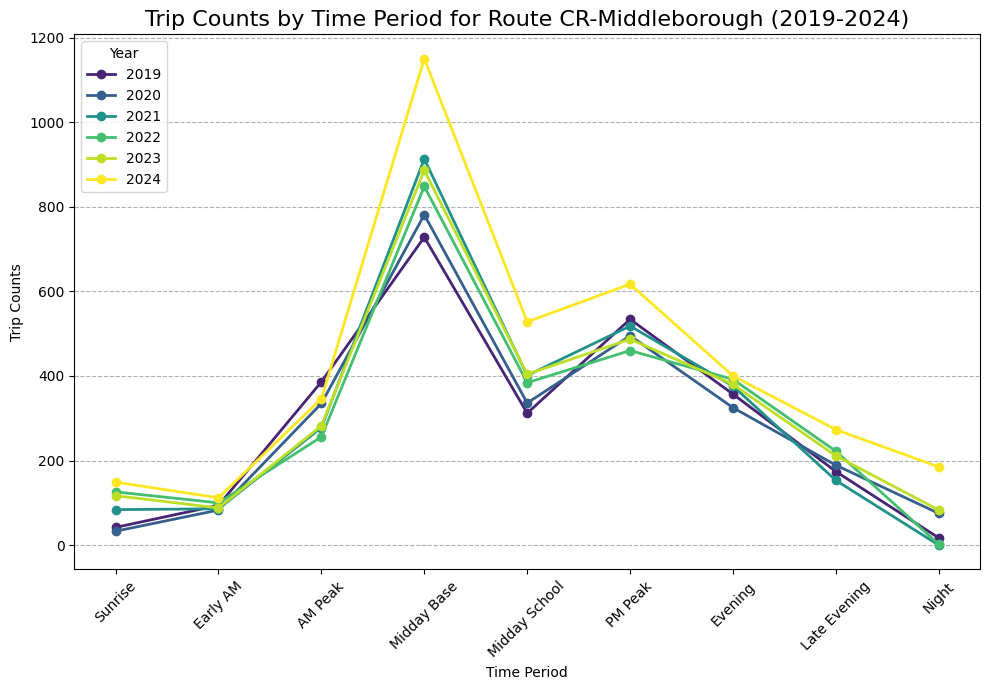

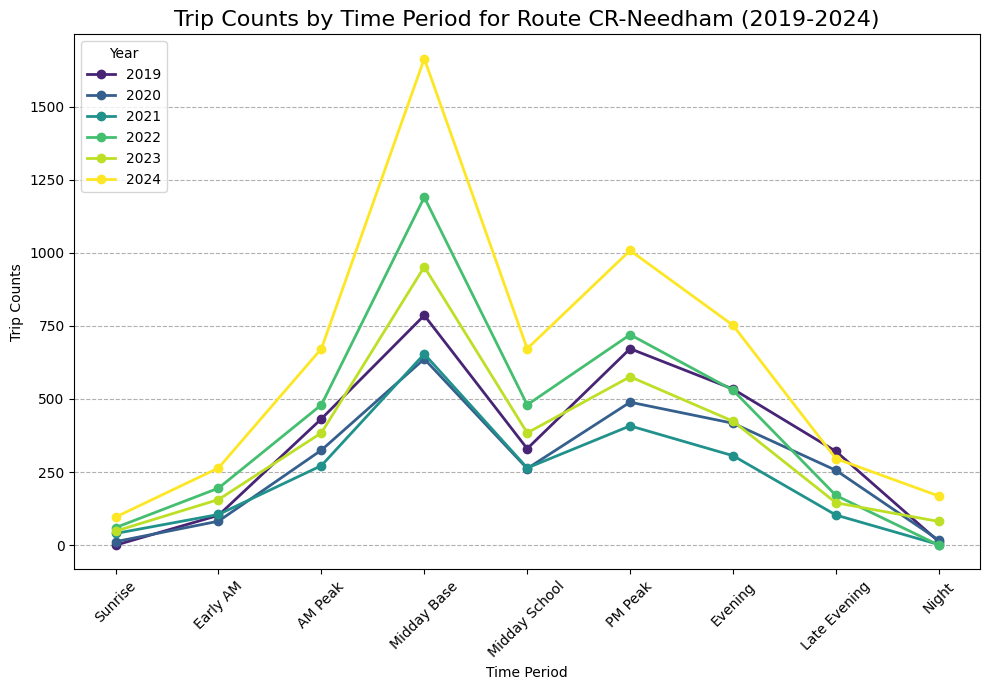

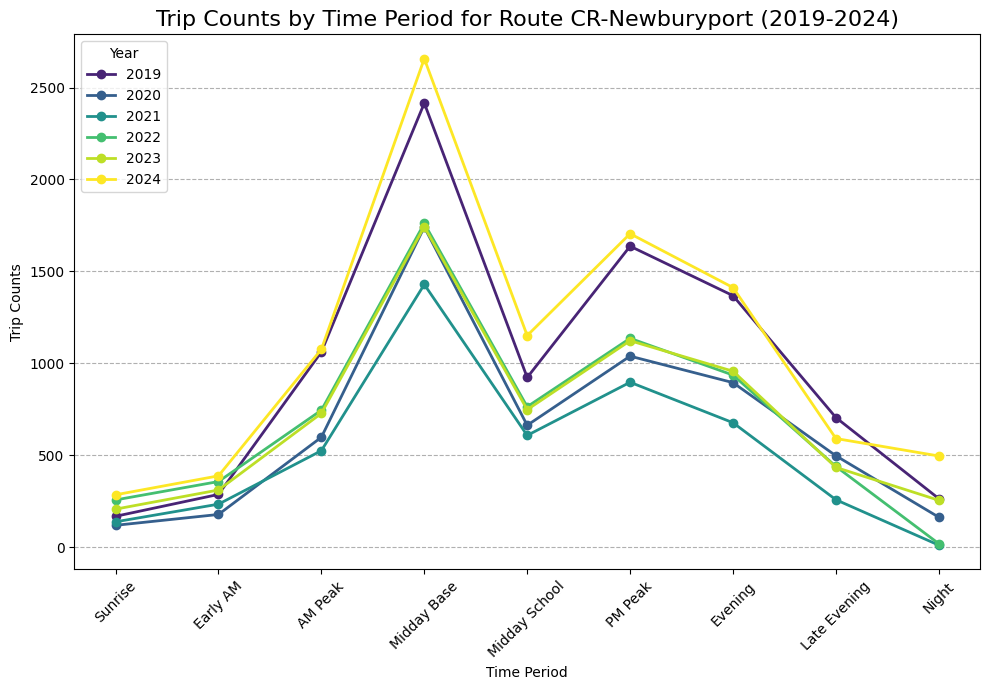

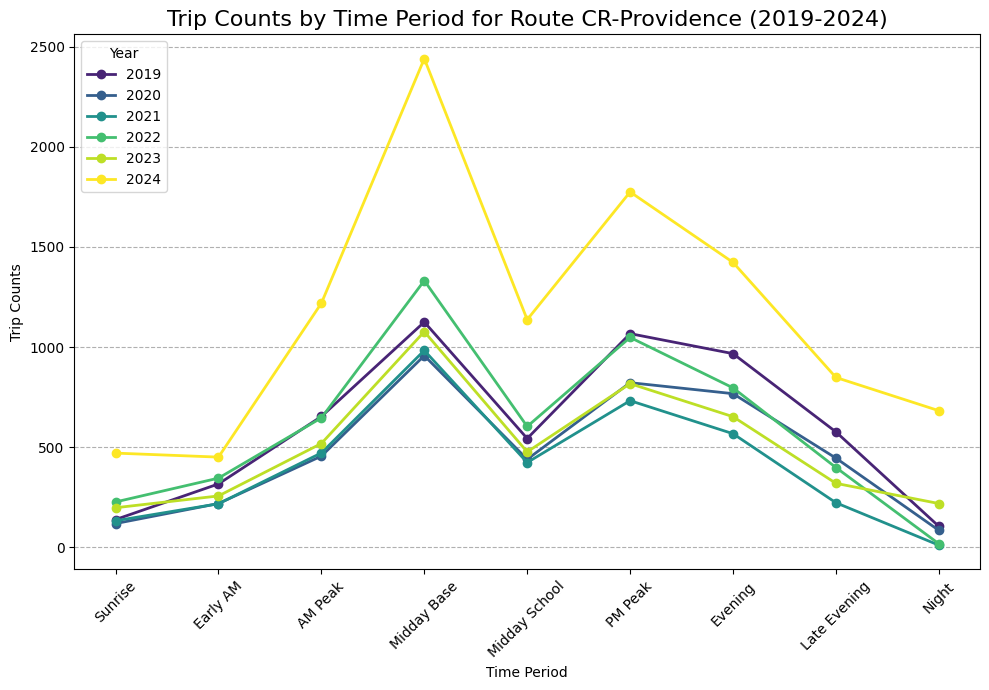

In [16]:
lines = [
    'CR-Fairmount', 'CR-Fitchburg', 'CR-Franklin','CR-Greenbush',
    'CR-Worcester',  'CR-Haverhill', 
    'CR-Kingston', 'CR-Lowell', 'CR-Middleborough', 
    'CR-Needham','CR-Newburyport','CR-Providence', 
    
]
for line in lines:
    plot_annual_trip_counts(line, trip_counts1)

Merge Trips and Calendar

In [17]:
tripcalendar_data = {}
for year in years:
    trips_df = pd.concat([trips_data[f'trips_{year}{season}'] for season in seasons], ignore_index=True)
    calendar_df = pd.concat([calendar_data[f'calendar_{year}{season}'] for season in seasons], ignore_index=True)
    
    tripcalendar_data[f'tripcalendar_{year}'] = pd.merge(trips_df, calendar_df, on='service_id', how='left')

    globals()[f'tripcalendar_{year}'] = tripcalendar_data[f'tripcalendar_{year}']



In [18]:
tripcalendar_24.head(2)
tripcalendar_24.to_csv('/Users/lto/Desktop/tripcalendar_24.csv', index=False)

In [19]:
import pandas as pd
from datetime import datetime, timedelta



fitchburg_trips_2019 = tripcalendar_19[(tripcalendar_19['route_id'] == 'CR-Fitchburg')]

days_of_week = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
trip_counts = {day: 0 for day in days_of_week}

for _, row in fitchburg_trips_2019.iterrows():
    start_date = datetime.strptime(str(row['start_date']), '%Y%m%d')
    end_date = datetime.strptime(str(row['end_date']), '%Y%m%d')

    for day in days_of_week:
        if row[day] == 1: 
            current_date = start_date
            while current_date <= end_date:
                if current_date.strftime('%A').lower() == day:
                    trip_counts[day] += 1
                current_date += timedelta(days=1)

print("2019-Fitchburg:")
print(trip_counts)


2019-Fitchburg:
{'monday': 874, 'tuesday': 874, 'wednesday': 874, 'thursday': 874, 'friday': 874, 'saturday': 336, 'sunday': 280}


In [20]:
years = [19, 20, 21, 22, 23]
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

def get_mergeddata(year):
    for season in seasons:
        stop_times = stop_times_data.get(f'stop_times_{year}{season}')
        if stop_times is not None:
            stop_times['time_period'] = stop_times['arrival_time'].apply(time_of_day)
            
            trips = trips_data.get(f'trips_{year}{season}')
            if trips is not None:
                merged_data = stop_times.merge(trips[['trip_id', 'service_id', 'route_id', 'block_id']], on='trip_id')
                
                calendar = calendar_data.get(f'calendar_{year}{season}')
                if calendar is not None:
                    trip_calendar_stoptime_data = merged_data.merge(
                        calendar[['service_id', 'monday', 'tuesday', 
                                  'start_date', 'end_date',
                                  'wednesday', 'thursday', 'friday', 'saturday', 'sunday']],
                        on='service_id',  
                        how='left'  
                    )
    return trip_calendar_stoptime_data


In [21]:
merged_19 = get_mergeddata(19)
merged_20 = get_mergeddata(20)
merged_21 = get_mergeddata(21)
merged_22 = get_mergeddata(22)
merged_23 = get_mergeddata(23)
merged_24 = get_mergeddata(24)
list = [merged_19,merged_20, merged_21, merged_22, merged_23,merged_24]

In [22]:
merged_23.head(2)

trip_id arrival_time departure_time    stop_id  stop_sequence  \
0  CR-550873-1002     05:15:00       05:15:00  MM-0356-S              0   
1  CR-550873-1002     05:25:00       05:25:00  MM-0277-S             10   

  stop_headsign  pickup_type  drop_off_type  timepoint checkpoint_id  ...  \
0           NaN            0              1        1.0         ogmnl  ...   
1           NaN            0              0        1.0         ogmnl  ...   

   block_id  monday tuesday start_date  end_date wednesday  thursday  friday  \
0      B-01       0       0   20230128  20230311         0         0       0   
1      B-01       0       0   20230128  20230311         0         0       0   

   saturday  sunday  
0         1       0  
1         1       0  

[2 rows x 25 columns]

In [23]:
columns_to_drop = ['arrival_time', 'departure_time', 'stop_sequence', 
                   'checkpoint_id', 
                   'stop_headsign', 'pickup_type', 'drop_off_type']
all_merged_data = []
for i in list:
    i['time_period'] = i['arrival_time'].apply(time_of_day)
    i= i.drop(columns=columns_to_drop)
    all_merged_data.append(i)

In [24]:
merged_19['route_id'].unique()

array(['CR-Middleborough', 'CR-Kingston', 'CR-Greenbush',
       'CR-Newburyport', 'CR-Haverhill', 'CR-Lowell', 'CR-Fitchburg',
       'CR-Worcester', 'CR-Needham', 'CR-Franklin', 'CR-Fairmount',
       'CR-Providence'], dtype=object)

In [25]:
merged_19.head(2)

trip_id arrival_time departure_time        stop_id  \
0  CR-Saturday-Fall-18-1001     08:40:00       08:40:00  South Station   
1  CR-Saturday-Fall-18-1001     08:46:00       08:46:00      JFK/UMASS   

   stop_sequence  stop_headsign  pickup_type  drop_off_type  timepoint  \
0              1            NaN            0              1        1.0   
1              2            NaN            3              3        1.0   

  checkpoint_id  ... block_id monday tuesday start_date  end_date  wednesday  \
0         orhgt  ...     B-31      0       0   20190204  20190316          0   
1         orhgt  ...     B-31      0       0   20190204  20190316          0   

   thursday  friday  saturday  sunday  
0         0       0         1       0  
1         0       0         1       0  

[2 rows x 23 columns]

In [26]:
final_data = pd.concat(all_merged_data, ignore_index=True)

output_file = '/Users/lto/Desktop/merged_19_24.csv'
final_data.to_csv(output_file, index=False)

print(f"saved as {output_file}")


saved as /Users/lto/Desktop/merged_19_24.csv


In [27]:
final_data.head(2)

trip_id        stop_id  timepoint time_period  \
0  CR-Saturday-Fall-18-1001  South Station        1.0     AM Peak   
1  CR-Saturday-Fall-18-1001      JFK/UMASS        1.0     AM Peak   

                          service_id          route_id block_id  monday  \
0  CR-Saturday-Middleborough-Fall-18  CR-Middleborough     B-31       0   
1  CR-Saturday-Middleborough-Fall-18  CR-Middleborough     B-31       0   

   tuesday  start_date  end_date  wednesday  thursday  friday  saturday  \
0        0    20190204  20190316          0         0       0         1   
1        0    20190204  20190316          0         0       0         1   

   sunday  continuous_pickup  continuous_drop_off  
0       0                NaN                  NaN  
1       0                NaN                  NaN

In [28]:
import pandas as pd

final_data['start_date'] = pd.to_datetime(final_data['start_date'], format='%Y%m%d')
final_data['end_date'] = pd.to_datetime(final_data['end_date'], format='%Y%m%d')

fitchburg_2019 = final_data[(final_data['route_id'] == 'CR-Fitchburg') & (final_data['start_date'].dt.year == 2019)]

fitchburg_2019_monday = fitchburg_2019[fitchburg_2019['monday'] == 1]

fitchburg_2019_monday_grouped = fitchburg_2019_monday.groupby(['time_period', 'start_date']).size().reset_index(name='trip_count')

print(fitchburg_2019_monday_grouped)


     time_period start_date  trip_count
0        AM Peak 2019-02-04          87
1       Early AM 2019-02-04          31
2        Evening 2019-02-04          91
3   Late Evening 2019-02-04          44
4    Midday Base 2019-02-04         131
5  Midday School 2019-02-04          50
6          Night 2019-02-04          20
7        PM Peak 2019-02-04         129
8        Sunrise 2019-02-04          14


In [29]:
import pandas as pd

# Define lists for weekdays, weekends, and commuter rail lines
inweekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Saturday', 'Sunday']
lines = [
    'CR-Fairmount', 'CR-Fitchburg', 'CR-Franklin','CR-Greenbush',
    'CR-Worcester',  'CR-Haverhill', 
    'CR-Kingston', 'CR-Lowell', 'CR-Middleborough', 
    'CR-Needham','CR-Newburyport','CR-Providence', 
    
]
# Convert date columns to datetime if not already done
final_data['start_date'] = pd.to_datetime(final_data['start_date'], format='%Y%m%d')
final_data['end_date'] = pd.to_datetime(final_data['end_date'], format='%Y%m%d')

# Initialize a dictionary to store results
trip_counts = {}

# Iterate through each line
for line in lines:
    # Filter for the current line
    line_data = final_data[final_data['route_id'] == line]
    
    # Initialize a dictionary for each line to hold trip counts by day and time period
    trip_counts[line] = {}
    
    # Loop through weekdays and weekend days
    for day in inweekdays + weekend:
        # Filter trips that operate on the specific day
        day_data = line_data[line_data[day.lower()] == 1]
        
        # Group by time period and count trips
        trip_count_by_time_period = day_data.groupby('time_period')['trip_id'].count()
        
        # Store the result in the dictionary
        trip_counts[line][day] = trip_count_by_time_period.to_dict()

# Convert to DataFrame if needed
trip_counts_df = pd.DataFrame.from_dict({(i,j): trip_counts[i][j] 
                           for i in trip_counts.keys() 
                           for j in trip_counts[i].keys()},
                       orient='index')
trip_counts_df.index.names = ['Line', 'Day']
trip_counts_df.fillna(0, inplace=True) # Fill NaNs with 0 if any periods have no trips

print(trip_counts_df)


                         AM Peak  Early AM  Evening  Late Evening  \
Line          Day                                                   
CR-Fairmount  Monday         252        94      317           102   
              Tuesday        252        94      317           102   
              Wednesday      252        94      317           102   
              Thursday       252        94      317           102   
              Friday         252        94      317           102   
...                          ...       ...      ...           ...   
CR-Providence Wednesday      575       239      635           330   
              Thursday       575       239      635           330   
              Friday         575       239      635           330   
              Saturday       119        74      193            98   
              Sunday          82        57      193            98   

                         Midday Base  Midday School  PM Peak  Sunrise  Night  
Line          Day      

In [30]:
import pandas as pd

# Define lists for weekdays, weekends, and commuter rail lines
inweekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Saturday', 'Sunday']
lines = [
    'CR-Fairmount', 'CR-Fitchburg', 'CR-Franklin','CR-Greenbush',
    'CR-Worcester',  'CR-Haverhill', 
    'CR-Kingston', 'CR-Lowell', 'CR-Middleborough', 
    'CR-Needham','CR-Newburyport','CR-Providence', 
    
]

# Convert date columns to datetime if not already done
final_data['start_date'] = pd.to_datetime(final_data['start_date'], format='%Y%m%d')
final_data['end_date'] = pd.to_datetime(final_data['end_date'], format='%Y%m%d')

# Initialize a dictionary to store results
trip_counts = {}

# Iterate through each line
for line in lines:
    # Filter for the current line
    line_data = final_data[final_data['route_id'] == line]
    
    # Initialize a dictionary for each line to hold trip counts by day and time period
    trip_counts[line] = {}
    
    # Loop through each year from 2019 to 2024
    for year in range(2019, 2025):
        # Filter data for the current year
        year_data = line_data[(line_data['start_date'].dt.year <= year) & 
                              (line_data['end_date'].dt.year >= year)]
        
        # Initialize a dictionary for the current year within the line dictionary
        trip_counts[line][year] = {}

        # Loop through weekdays and weekend days
        for day in inweekdays + weekend:
            # Filter trips that operate on the specific day
            day_data = year_data[year_data[day.lower()] == 1]
            
            # Group by time period and count trips
            trip_count_by_time_period = day_data.groupby('time_period')['trip_id'].count()
            
            # Store the result in the dictionary under the current year
            trip_counts[line][year][day] = trip_count_by_time_period.to_dict()

# Convert to DataFrame if needed
trip_counts_df = pd.DataFrame.from_dict(
    {(line, year, day): trip_counts[line][year][day] 
     for line in trip_counts.keys() 
     for year in trip_counts[line].keys()
     for day in trip_counts[line][year].keys()},
    orient='index'
)

trip_counts_df.index.names = ['Line', 'Year', 'Day']
trip_counts_df.fillna(0, inplace=True) # Fill NaNs with 0 if any periods have no trips

print(trip_counts_df)


                              AM Peak  Early AM  Evening  Late Evening  \
Line          Year Day                                                   
CR-Fairmount  2019 Monday        42.0      16.0       55            19   
                   Tuesday       42.0      16.0       55            19   
                   Wednesday     42.0      16.0       55            19   
                   Thursday      42.0      16.0       55            19   
                   Friday        42.0      16.0       55            19   
...                               ...       ...      ...           ...   
CR-Providence 2024 Saturday      21.0      16.0       30            22   
                   Sunday        21.0      16.0       30            22   
CR-Franklin   2019 Sunday         0.0       0.0       49            28   
CR-Providence 2019 Sunday         0.0       0.0       40            21   
              2020 Sunday         0.0       0.0       40            20   

                              Midday 

In [31]:
import os

# Define the path to the Desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "trip_counts_df.csv")

# Save DataFrame to CSV
trip_counts_df.to_csv(desktop_path, index=True)

print(f"File saved to {desktop_path}")


File saved to /Users/lto/Desktop/trip_counts_df.csv


In [32]:
trip_counts_df.head(20)

AM Peak  Early AM  Evening  Late Evening  \
Line         Year Day                                                   
CR-Fairmount 2019 Monday        42.0      16.0       55            19   
                  Tuesday       42.0      16.0       55            19   
                  Wednesday     42.0      16.0       55            19   
                  Thursday      42.0      16.0       55            19   
                  Friday        42.0      16.0       55            19   
                  Saturday      26.0       0.0       48            22   
                  Sunday        26.0       0.0       48            22   
             2020 Monday        38.0       1.0       28             9   
                  Tuesday       38.0       1.0       28             9   
                  Wednesday     38.0       1.0       28             9   
                  Thursday      38.0       1.0       28             9   
                  Friday        38.0       1.0       28             9   
                  Saturday      58.0       0.0      108            50   
                  Sunday        29.0       0.0       54            25   
             2021 Monday        29.0      16.0       54            25   
                  Tuesday       29.0      16.0       54            25   
                  Wednesday     29.0      16.0       54            25   
                  Thursday      29.0      16.0       54            25   
                  Friday        29.0      16.0       54            25   
                  Saturday      18.0       0.0       36             7   

                             Midday Base  Midday School  PM Peak  Sunrise  \
Line         Year Day                                                       
CR-Fairmount 2019 Monday              73             43       64      0.0   
                  Tuesday             73             43       64      0.0   
                  Wednesday           73             43       64      0.0   
                  Thursday            73             43       64      0.0   
                  Friday              73             43       64      0.0   
                  Saturday            80             32       48      0.0   
                  Sunday              80             32       48      0.0   
             2020 Monday              65             30       55      8.0   
                  Tuesday             65             30       55      8.0   
                  Wednesday           65             30       55      8.0   
                  Thursday            65             30       55      8.0   
                  Friday              65             30       55      8.0   
                  Saturday           180             72      108      0.0   
                  Sunday              90             36       54      0.0   
             2021 Monday              90             54       72      2.0   
                  Tuesday             90             54       72      2.0   
                  Wednesday           90             54       72      2.0   
                  Thursday            90             54       72      2.0   
                  Friday              90             54       72      2.0   
                  Saturday            63             20       36      0.0   

                             Night  
Line         Year Day               
CR-Fairmount 2019 Monday       0.0  
                  Tuesday      0.0  
                  Wednesday    0.0  
                  Thursday     0.0  
                  Friday       0.0  
                  Saturday     0.0  
                  Sunday       0.0  
             2020 Monday       0.0  
                  Tuesday      0.0  
                  Wednesday    0.0  
                  Thursday     0.0  
                  Friday       0.0  
                  Saturday     0.0  
                  Sunday       0.0  
             2021 Monday       0.0  
                  Tuesday      0.0  
                  Wednesday    0.0  
                  Thursd

In [33]:
import os

# Define the path to the Desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "trip_counts_df.csv")

# Save DataFrame to CSV
trip_counts_df.to_csv(desktop_path, index=True)

print(f"File saved to {desktop_path}")

File saved to /Users/lto/Desktop/trip_counts_df.csv


In [34]:
import matplotlib.pyplot as plt
Fitchburg_2019 = trip_counts_df.loc[('CR-Fitchburg', 2019)]
Fitchburg_2019.head(20)

/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/87424388.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  Fitchburg_2019 = trip_counts_df.loc[('CR-Fitchburg', 2019)]


AM Peak  Early AM  Evening  Late Evening  Midday Base  \
Day                                                                
Monday        87.0      31.0       91            44          131   
Tuesday       87.0      31.0       91            44          131   
Wednesday     87.0      31.0       91            44          131   
Thursday      87.0      31.0       91            44          131   
Friday        87.0      31.0       91            44          131   
Saturday      19.0       5.0       31            22           79   
Sunday        19.0       5.0       31            22           79   

           Midday School  PM Peak  Sunrise  Night  
Day                                                
Monday                50      129     14.0   20.0  
Tuesday               50      129     14.0   20.0  
Wednesday             50      129     14.0   20.0  
Thursday              50      129     14.0   20.0  
Friday                50      129     14.0   20.0  
Saturday              26       46      0.0   10.0  
Sunday                26       46      0.0   10.0

/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_cou

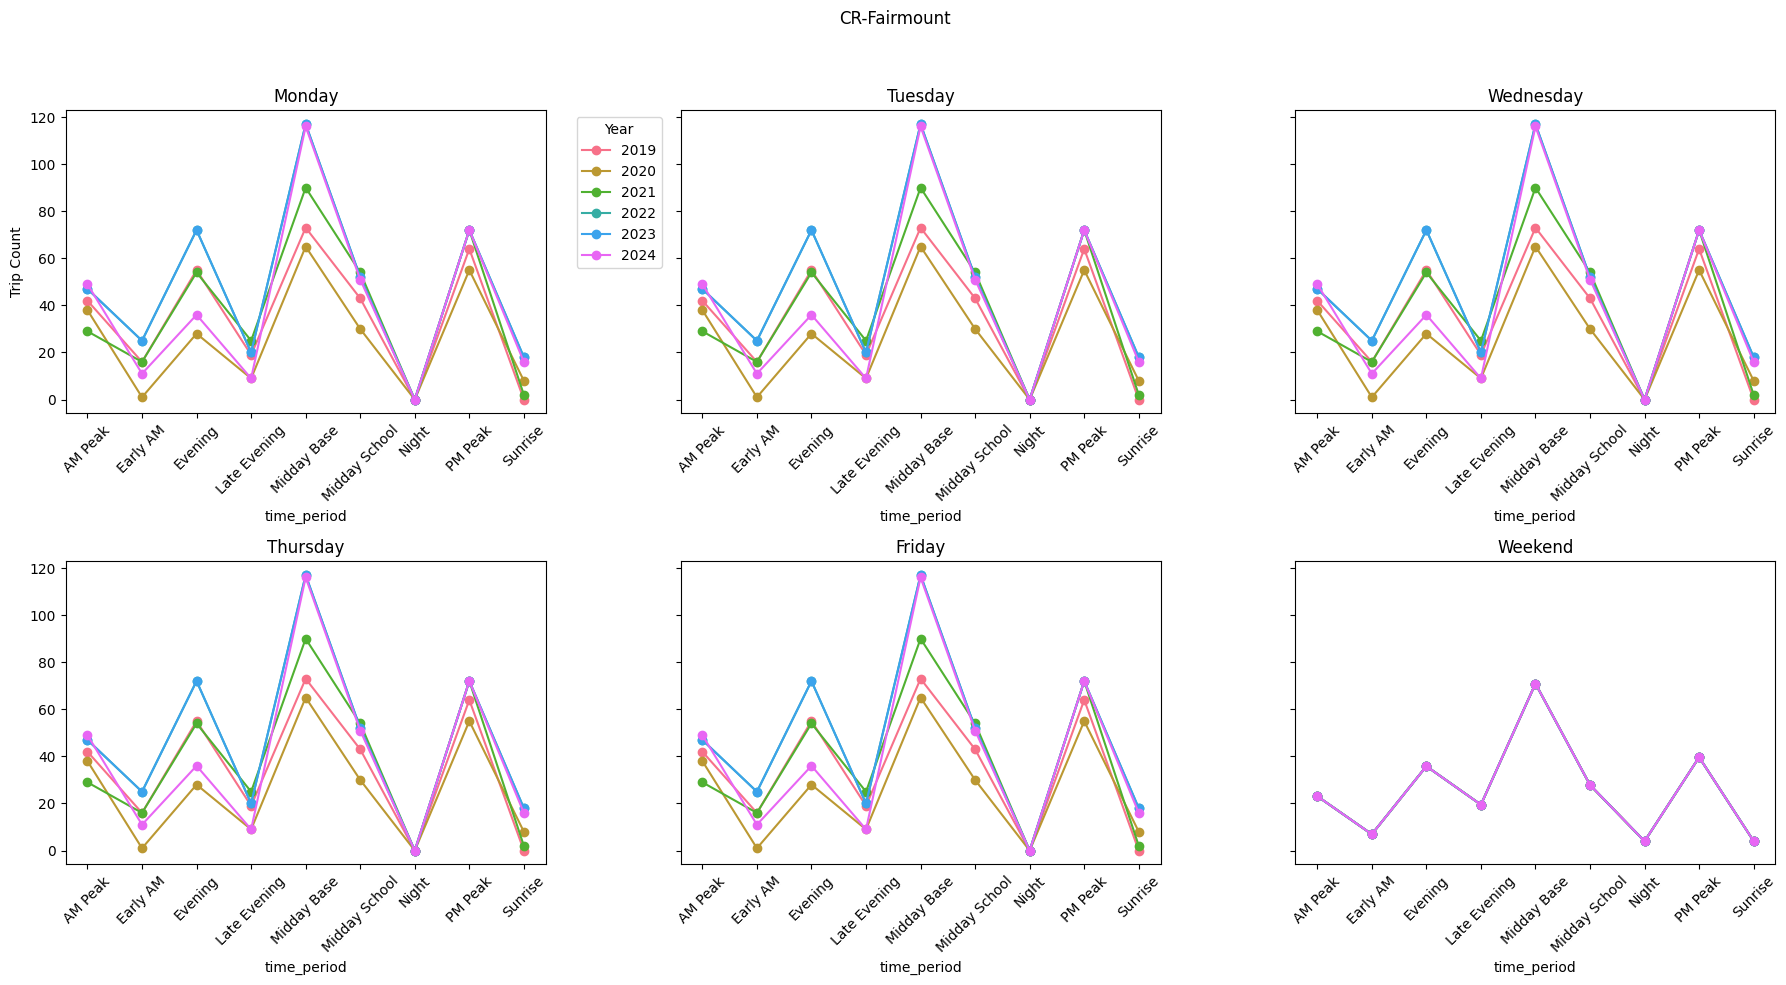

/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_cou

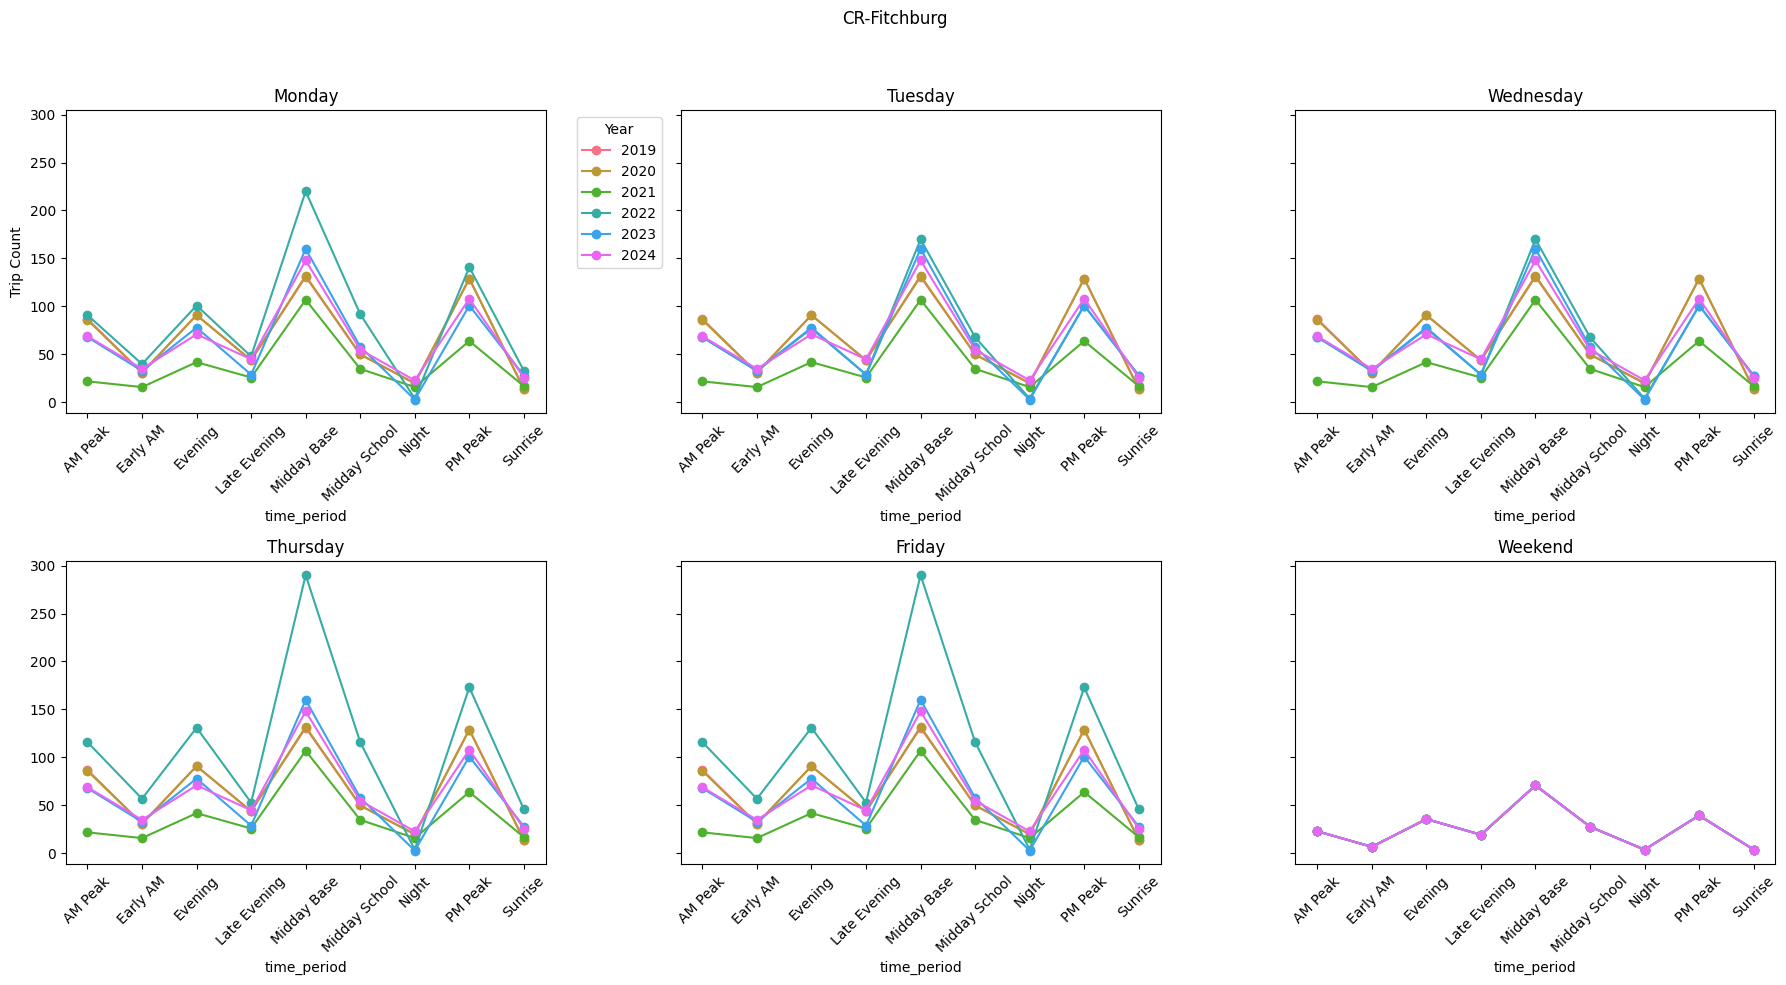

/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_cou

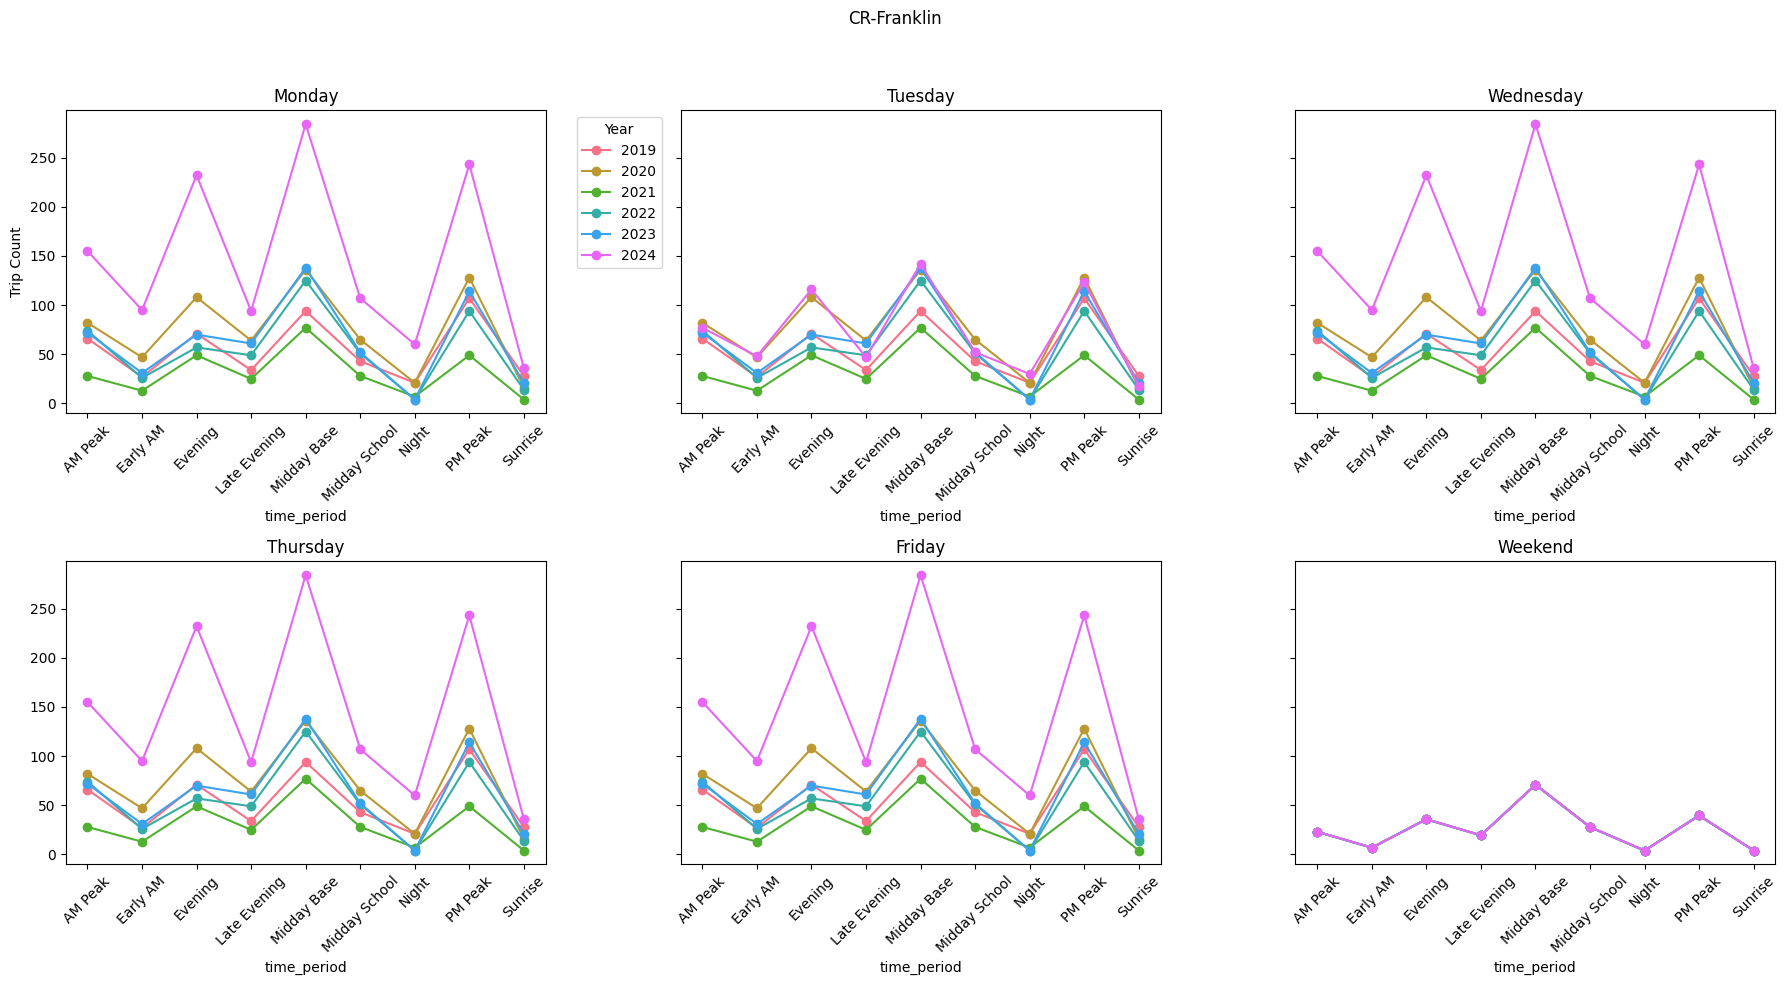

/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_cou

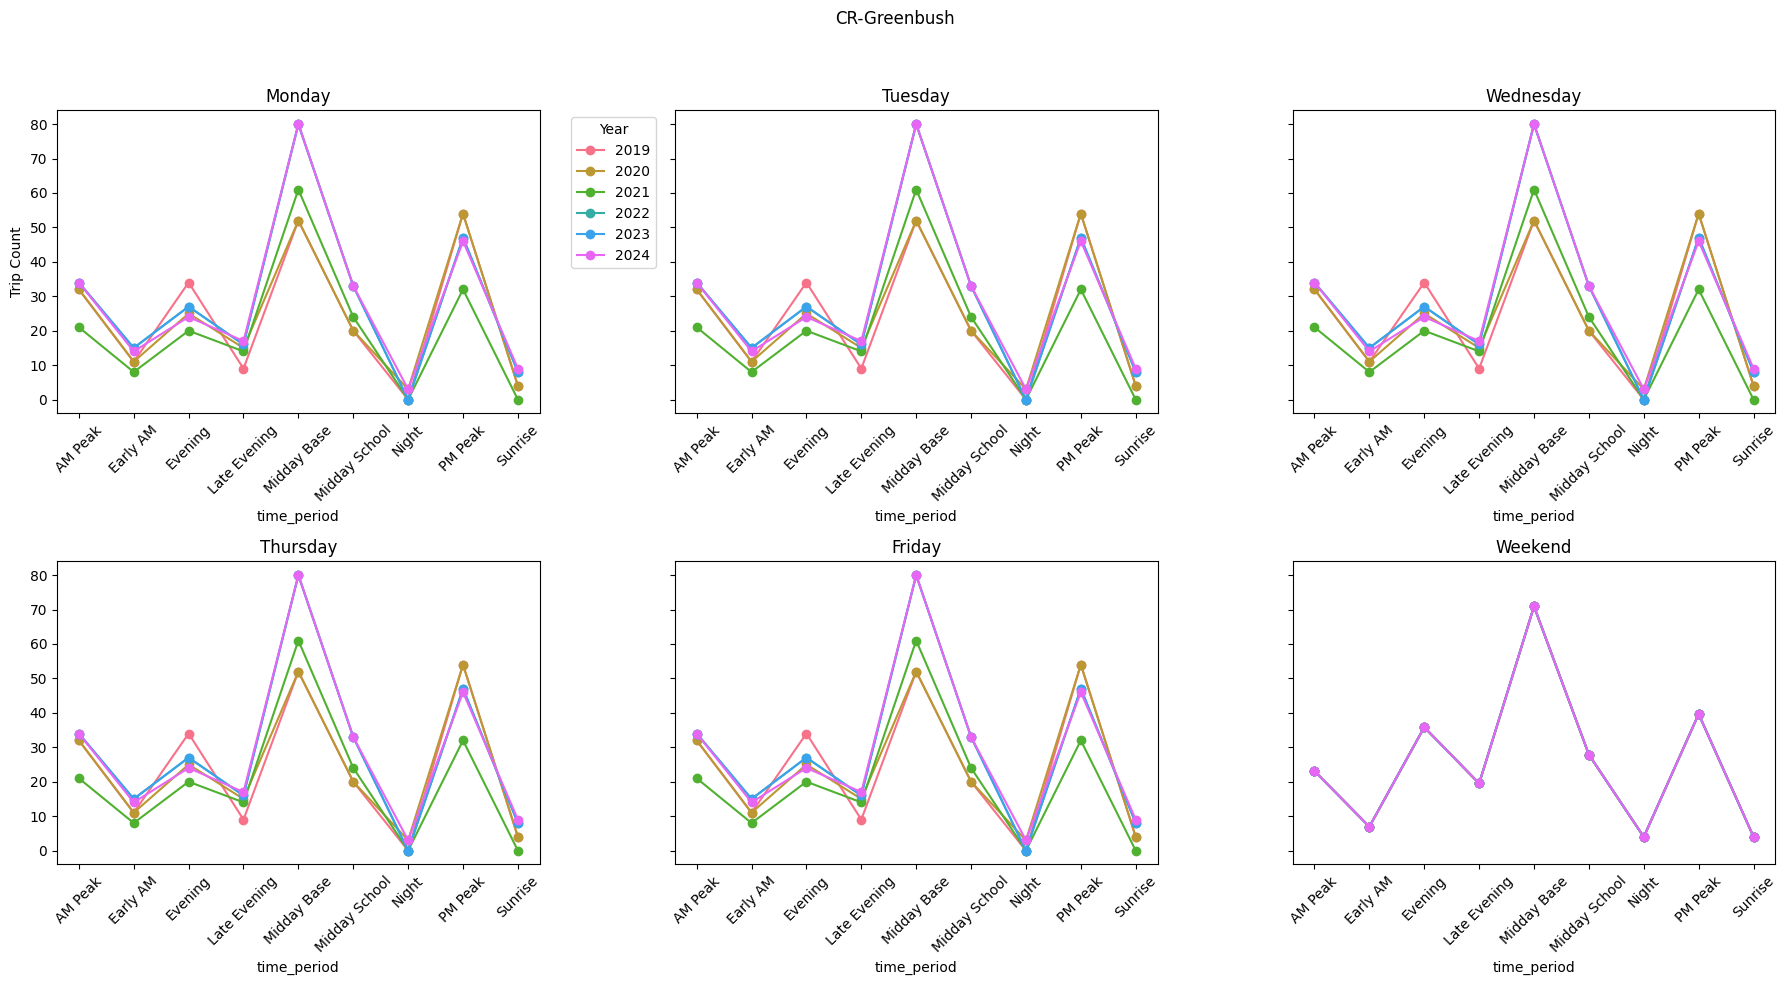

/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_cou

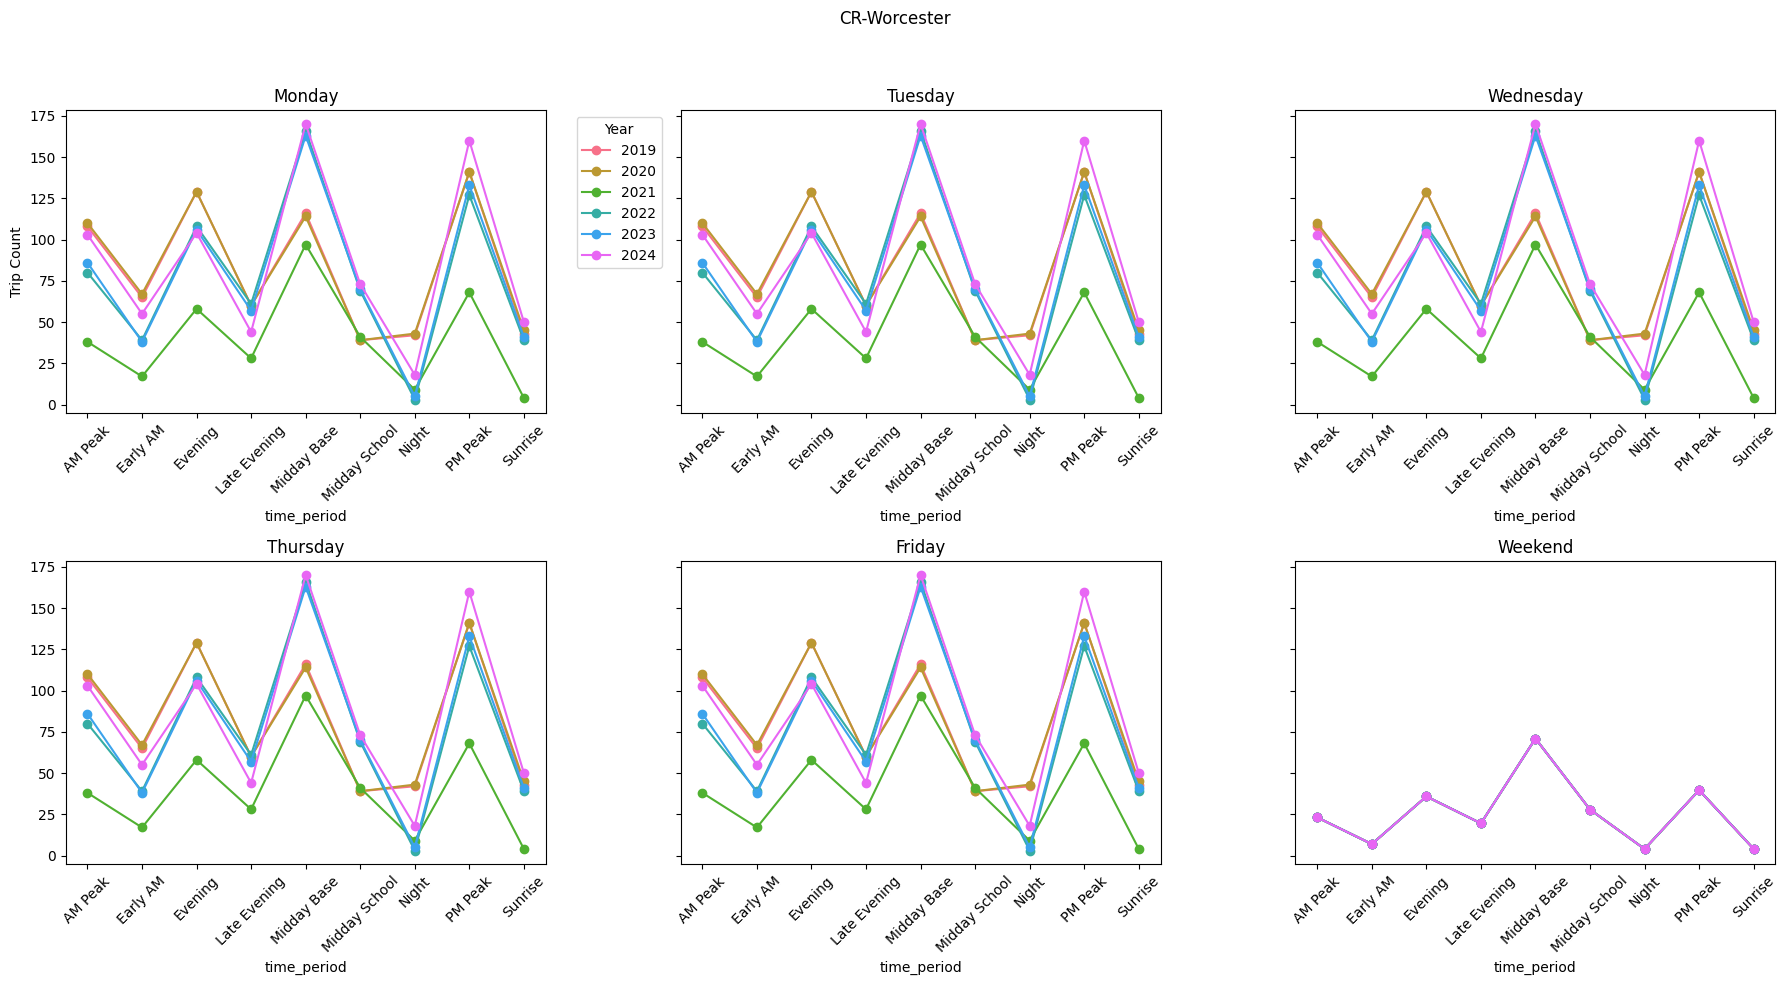

/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_cou

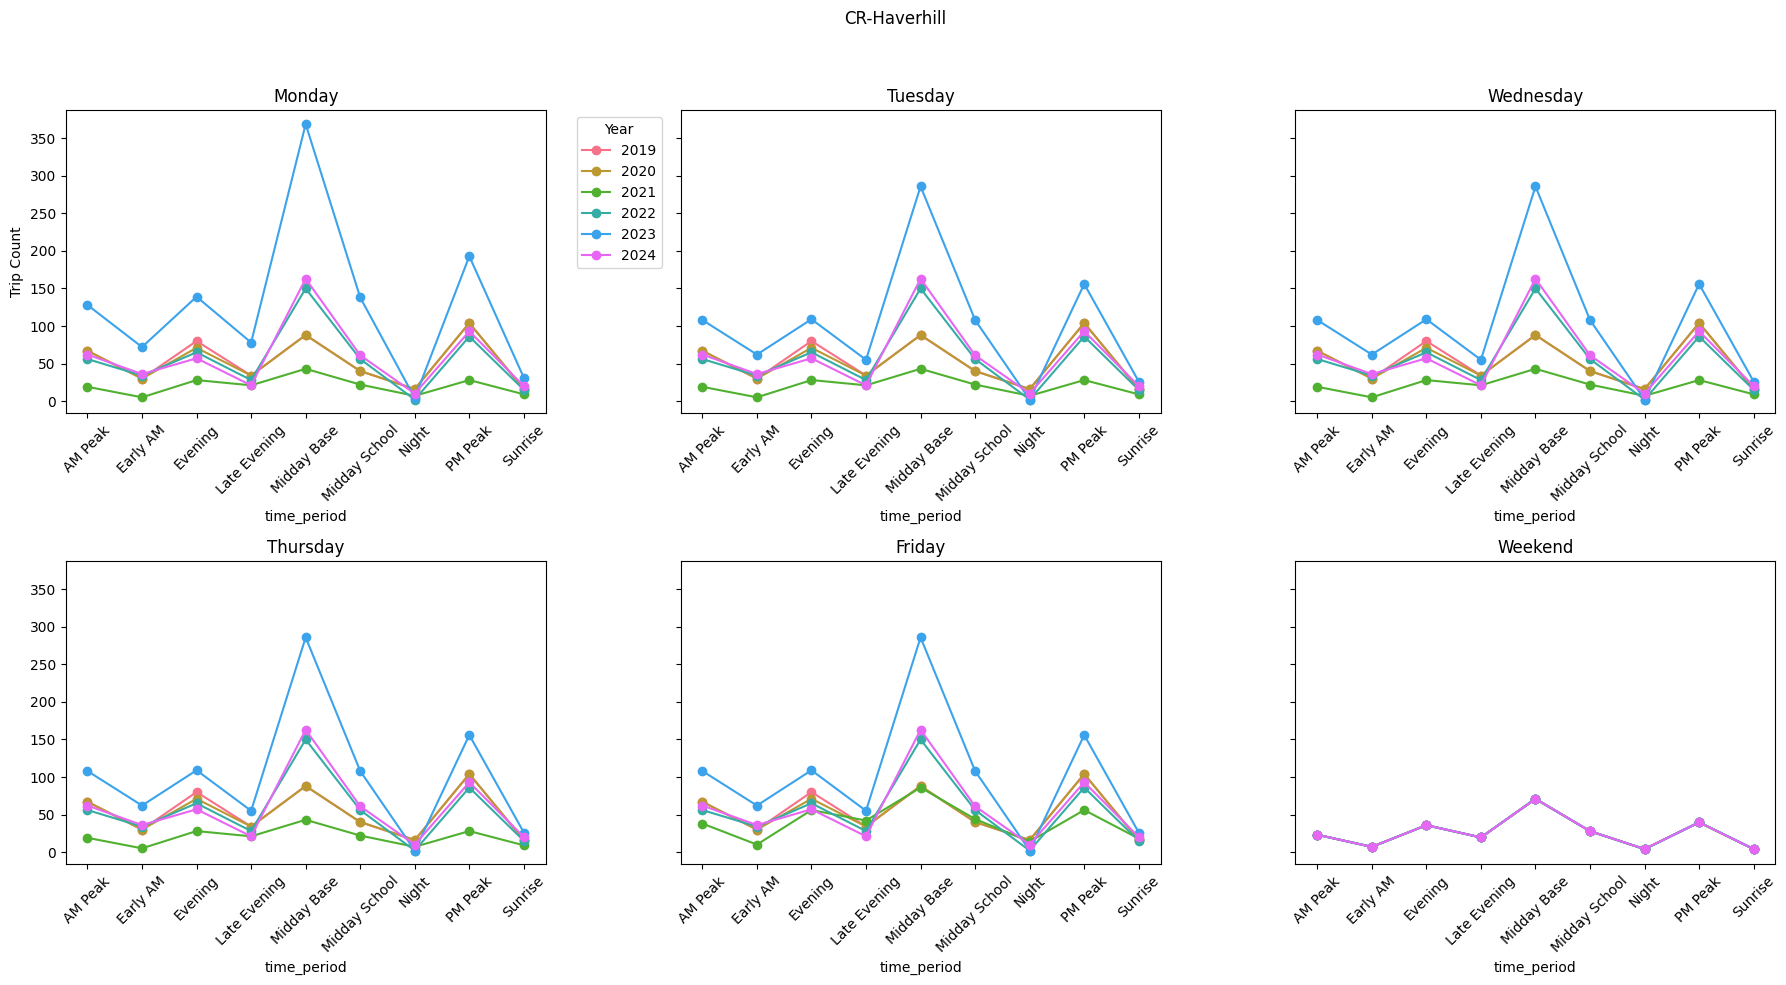

/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_cou

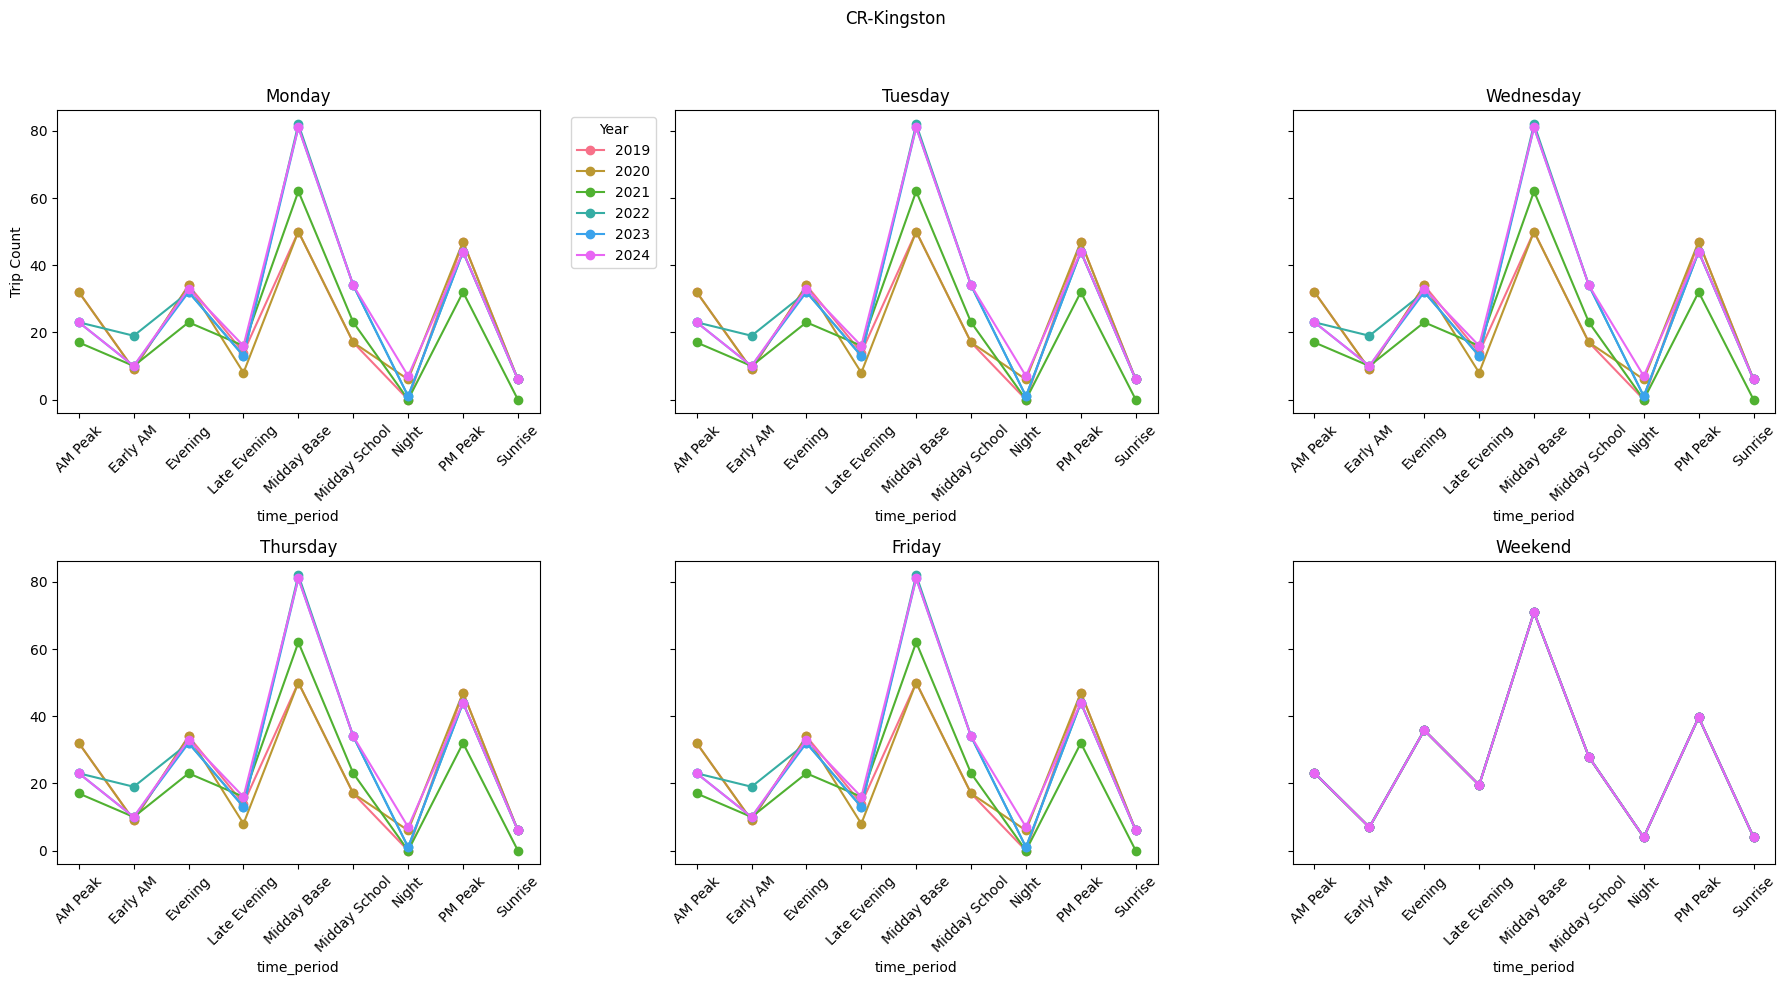

/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_cou

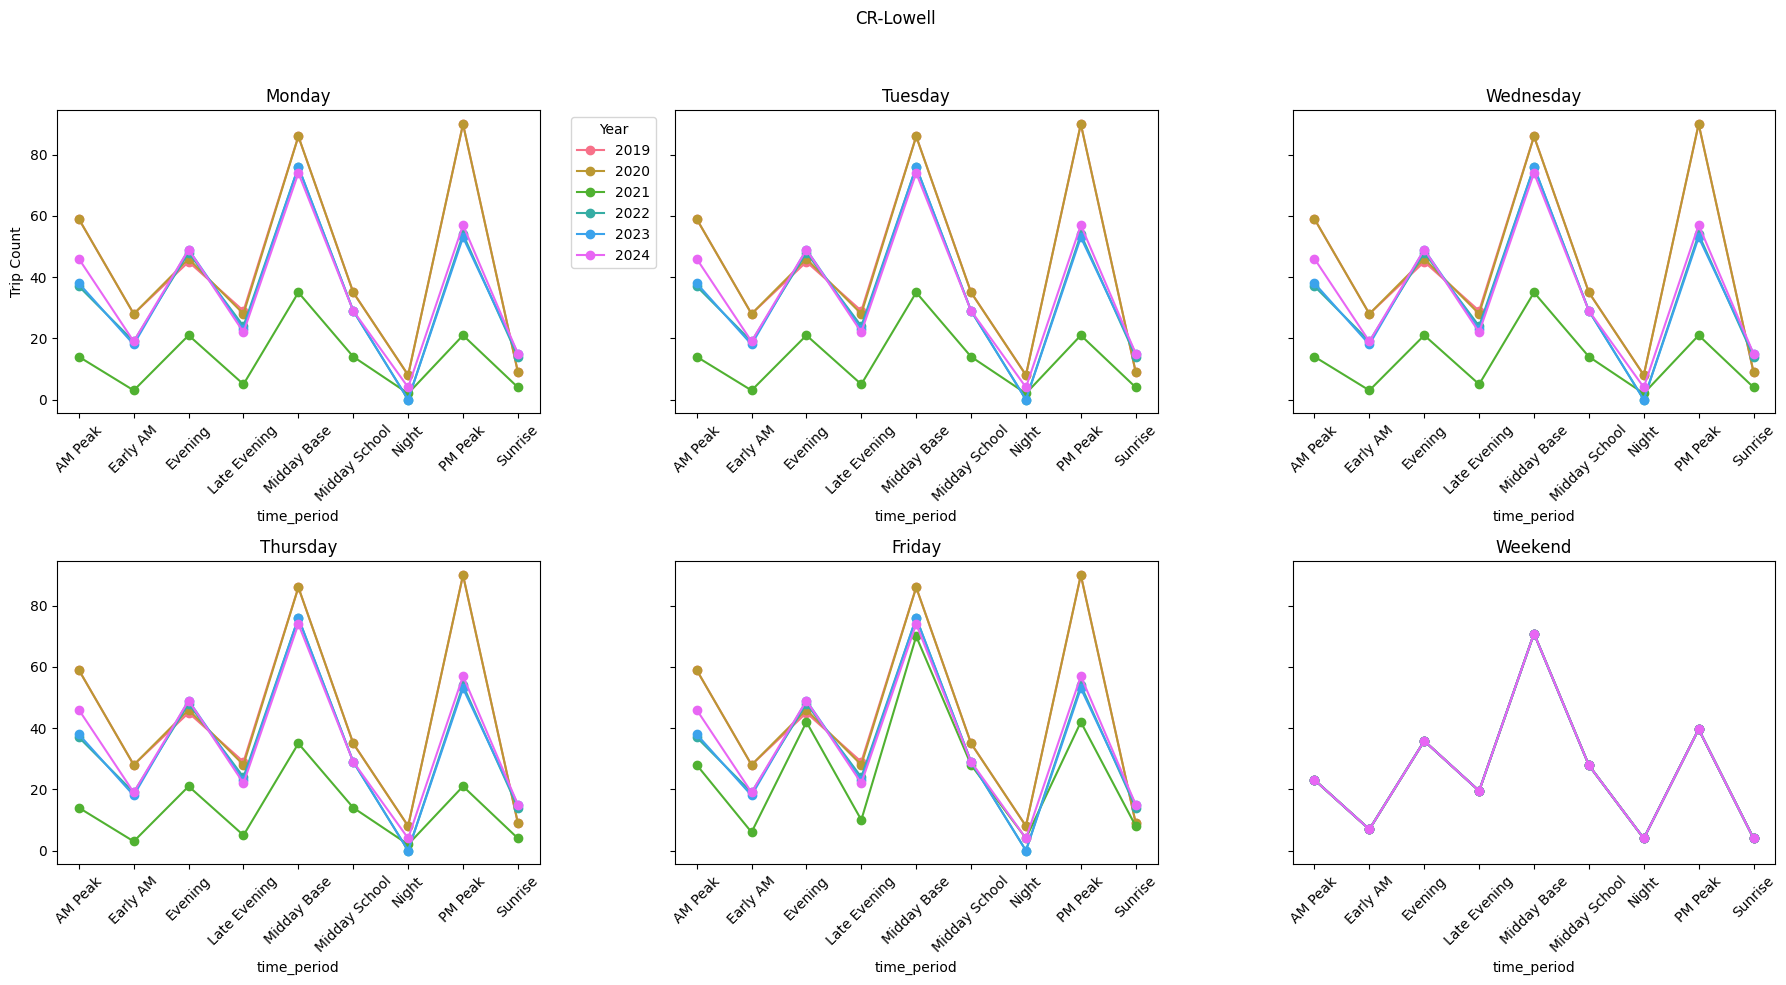

/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_cou

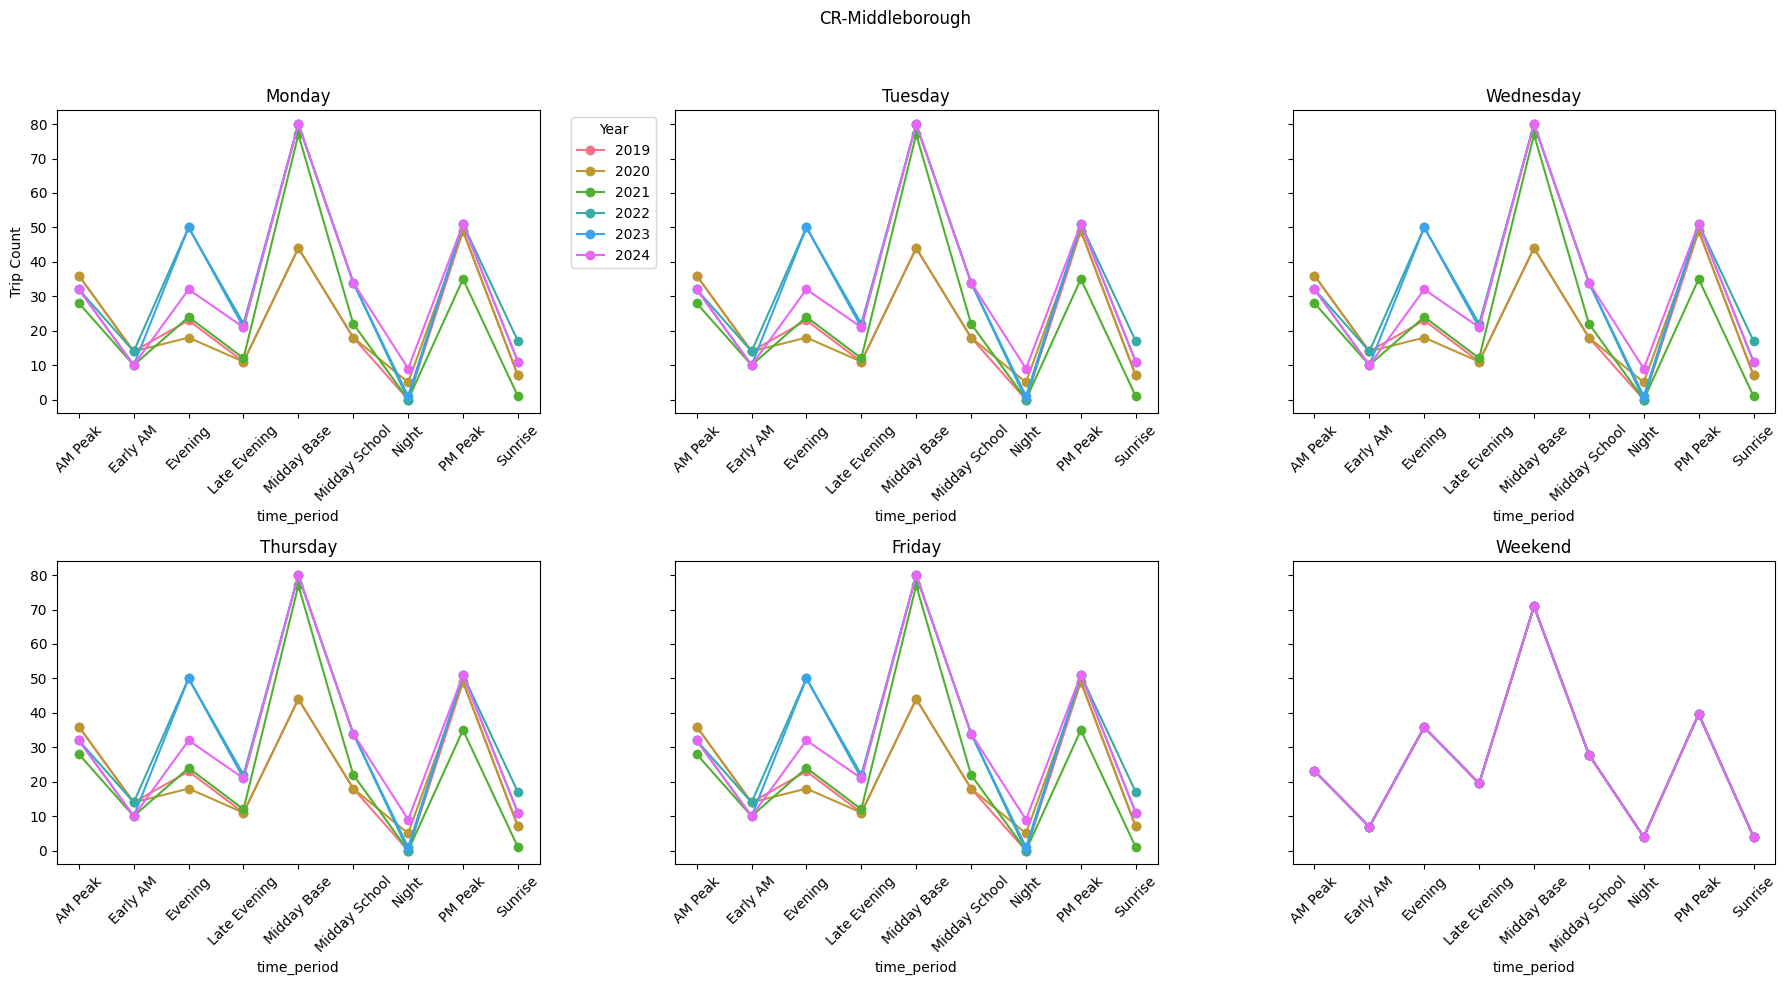

/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_cou

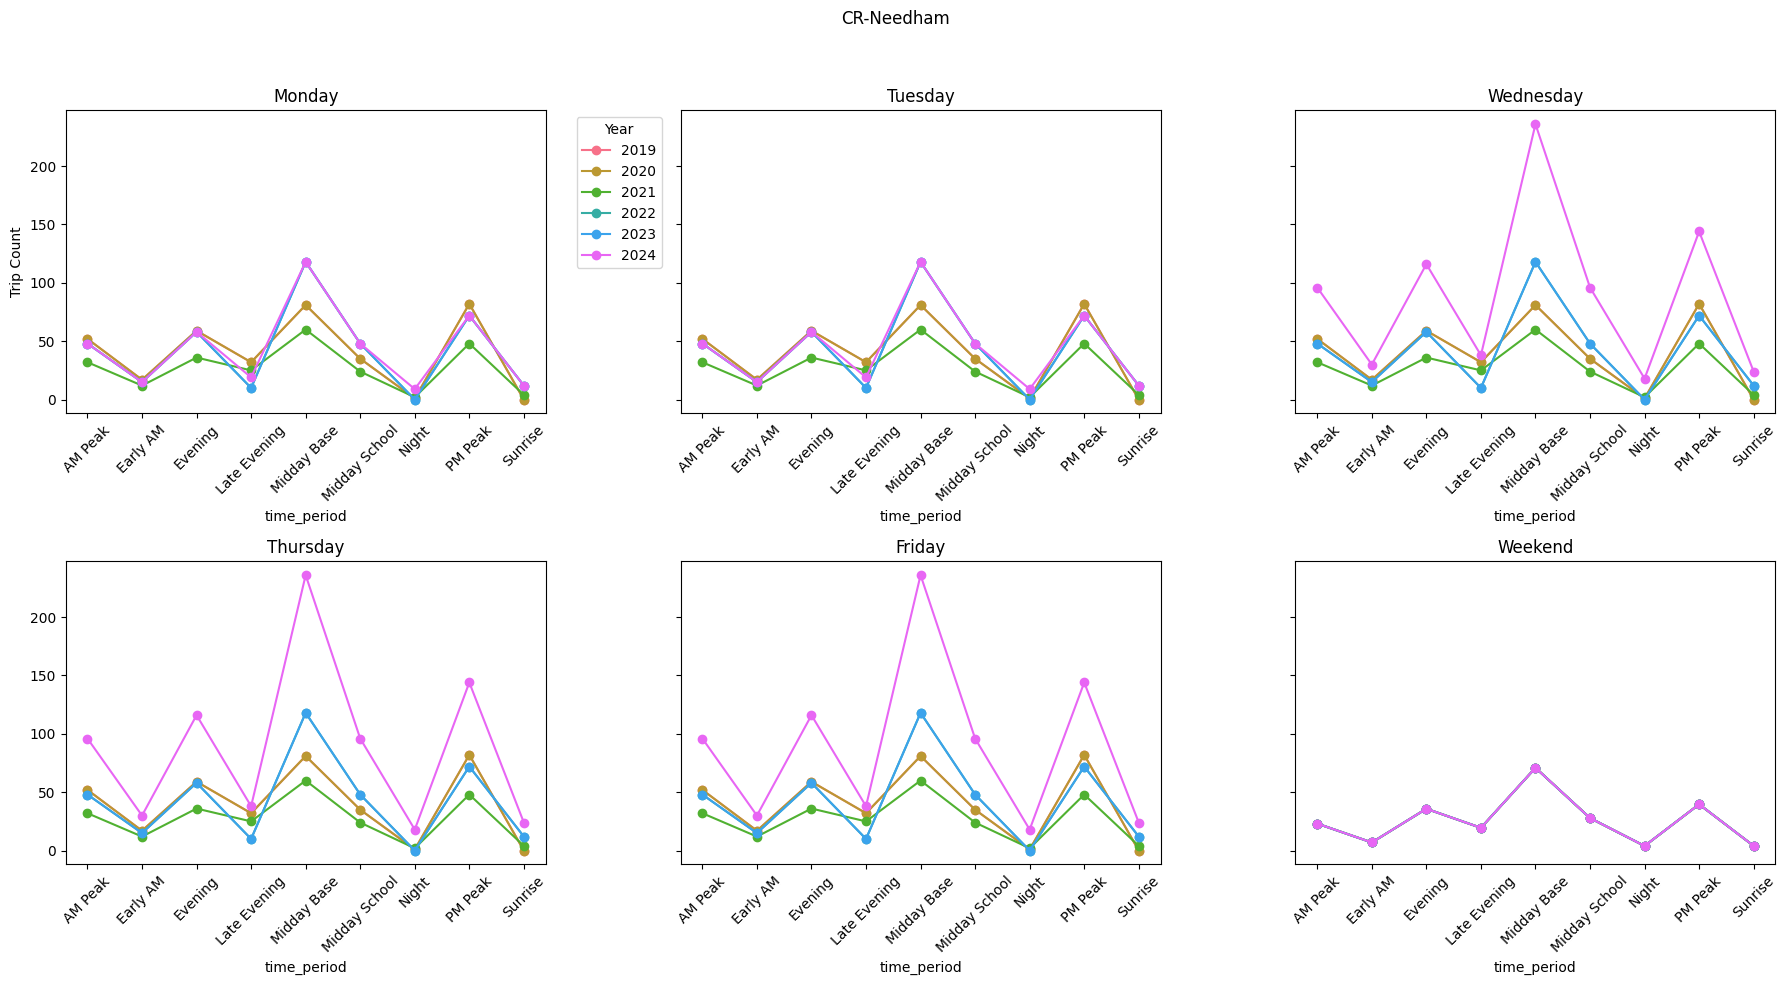

/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_cou

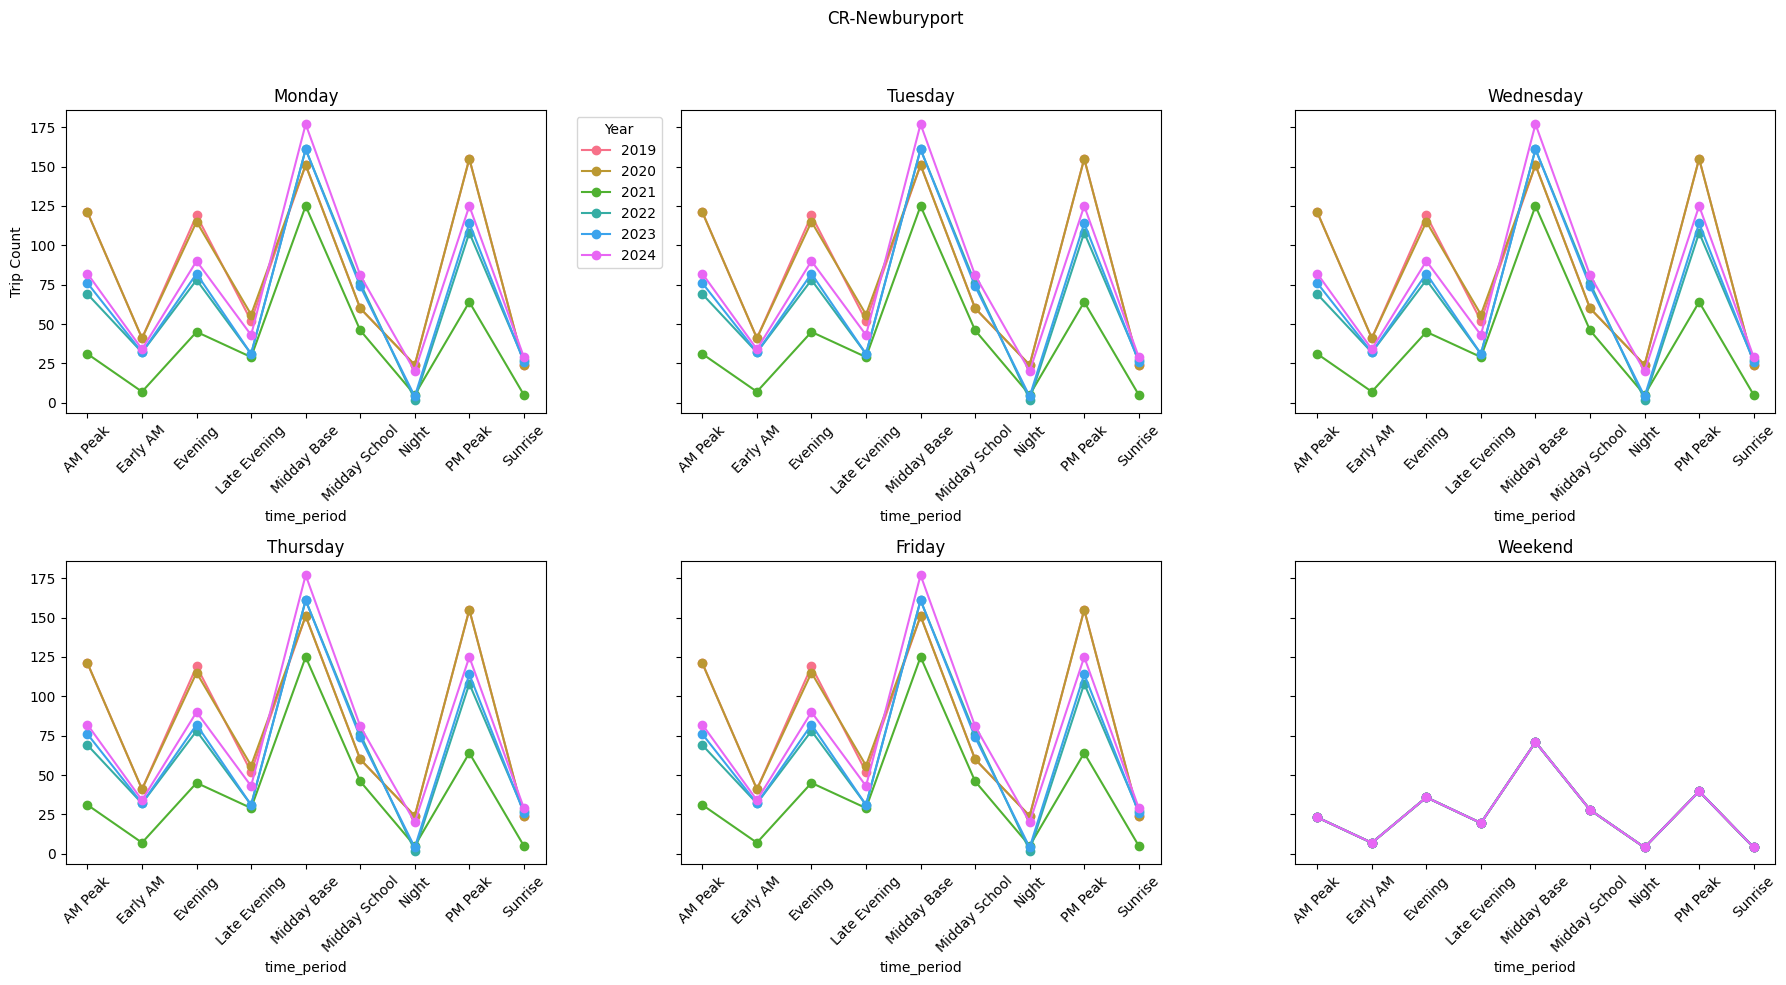

/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_counts_df.loc[(line, year)]
/var/folders/1p/4d9l1l9j50qd8m5y2zsf7k6r0000gn/T/ipykernel_51264/1817275717.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  weekend_data = trip_cou

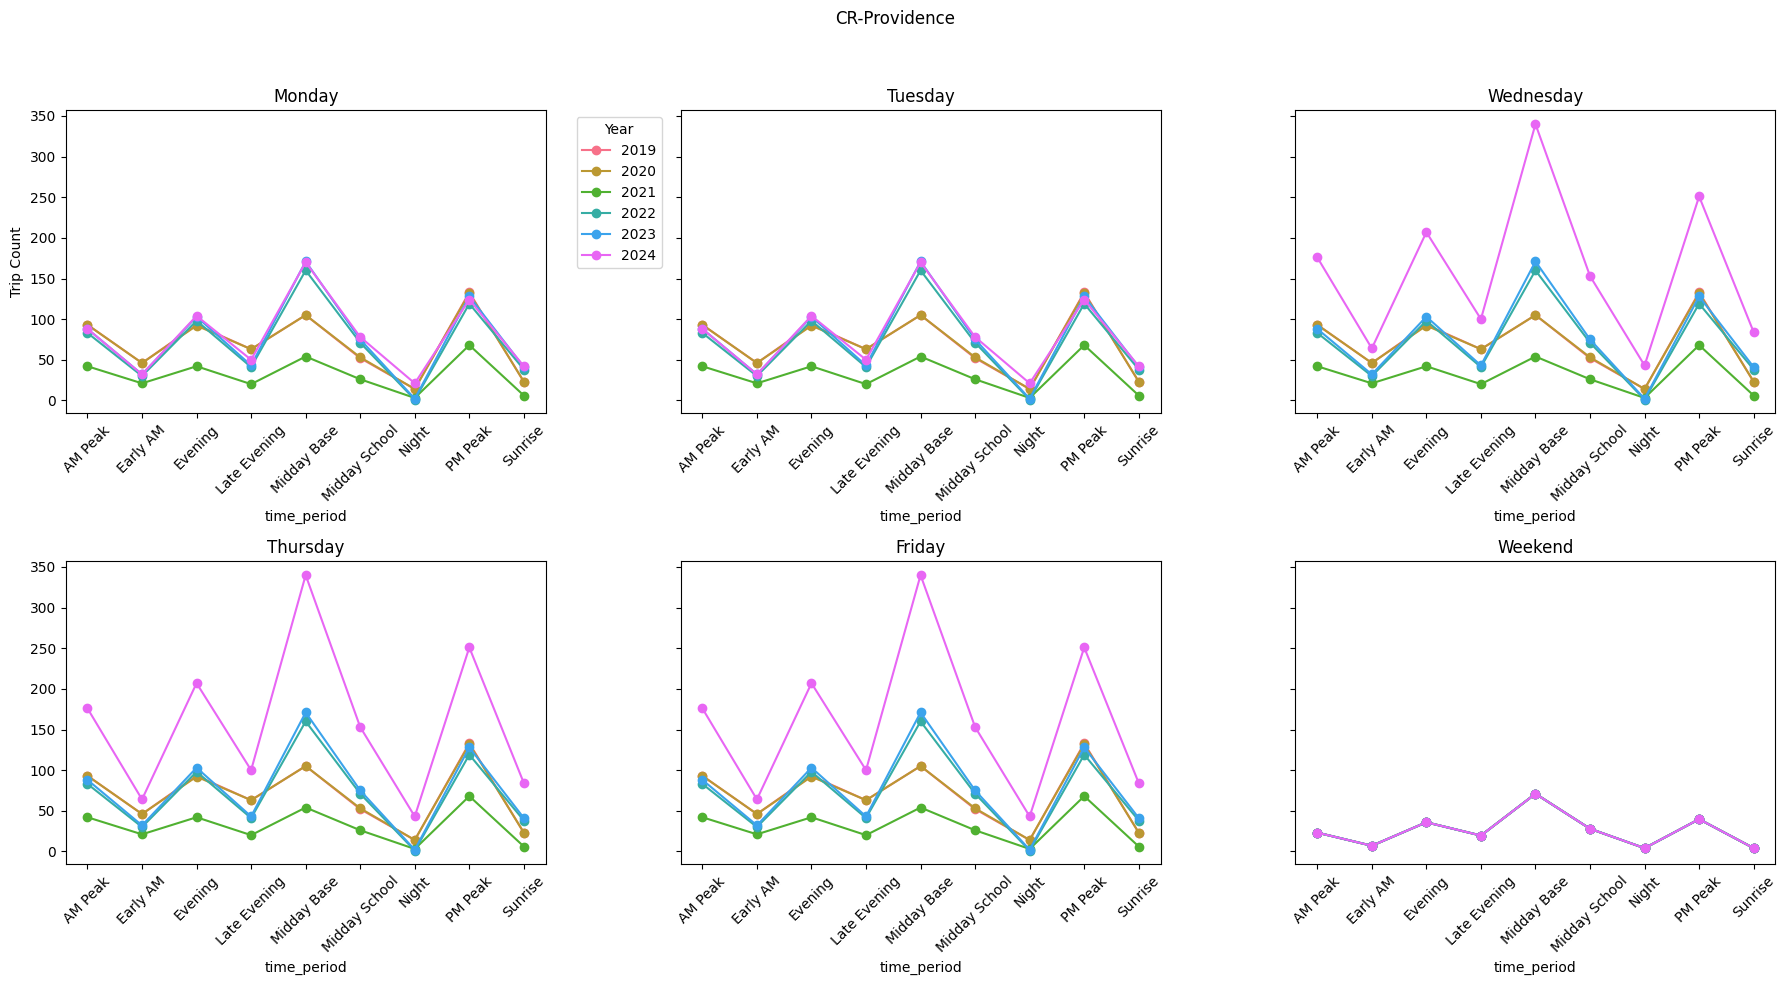

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

time_periods = ['AM Peak', 'Early AM', 'Evening', 'Late Evening', 'Midday Base', 
                'Midday School', 'Night', 'PM Peak', 'Sunrise']
years = [2019, 2020, 2021, 2022, 2023, 2024]
colors = sns.color_palette("husl", len(years))  
lines = [
    'CR-Fairmount', 'CR-Fitchburg', 'CR-Franklin','CR-Greenbush',
    'CR-Worcester',  'CR-Haverhill', 
    'CR-Kingston', 'CR-Lowell', 'CR-Middleborough', 
    'CR-Needham','CR-Newburyport','CR-Providence', 
    
]

def get_plot(line):
    fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
    axes = axes.flatten()
    fig.suptitle(line)
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    
    for i, day in enumerate(weekdays):
        for j, year in enumerate(years):
            # Access data using multi-level index: line, year, and day
            try:
                day_data = trip_counts_df.loc[(line, year, day)]  # Accessing based on line, year, and day
                axes[i].plot(time_periods, day_data[time_periods].values.flatten(), 
                             marker='o', label=year, color=colors[j])
            except KeyError:
                print(f"No data for {line} in {year} on {day}.")
        
        axes[i].set_title(day)
        axes[i].set_xlabel('time_period')
        axes[i].set_xticks(range(len(time_periods)))
        axes[i].set_xticklabels(time_periods, rotation=45)
        if i == 0:
            axes[i].set_ylabel('Trip Count')

    for j, year in enumerate(years):
        # Handling weekend data (Saturday and Sunday)
        weekend_data = trip_counts_df.loc[(line, year)]
        weekend_data = trip_counts_df[(trip_counts_df.index.get_level_values('Day').isin(['Saturday', 'Sunday']))]
        weekend_avg = weekend_data[time_periods].mean().values
        axes[5].plot(time_periods, weekend_avg, marker='o', color=colors[j], label=year)

    axes[5].set_title('Weekend')
    axes[5].set_xlabel('time_period')
    axes[5].set_xticks(range(len(time_periods)))
    axes[5].set_xticklabels(time_periods, rotation=45)

    axes[0].legend(title='Year', loc='upper left', bbox_to_anchor=(1.05, 1))

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Iterate over all lines to generate the plots
for line in lines:
    get_plot(line)
